# ROSE WINE SALES FORECAST


In [186]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from IPython.display import display
from statsmodels.tsa.arima.model import ARIMA

In [187]:
df2 = pd.read_csv(r"C:\Users\LOKI\Downloads\Rose.csv")
df2.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [188]:
df2.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [189]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


## Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [190]:
dates = pd.date_range(start='1980-01-01', freq='M', periods=len(df2))
df2.drop(['YearMonth'], axis=1, inplace = True)
df2.set_index(dates, inplace=True)

In [191]:
df2.head()

Rose
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

## Plotting the Time Series data

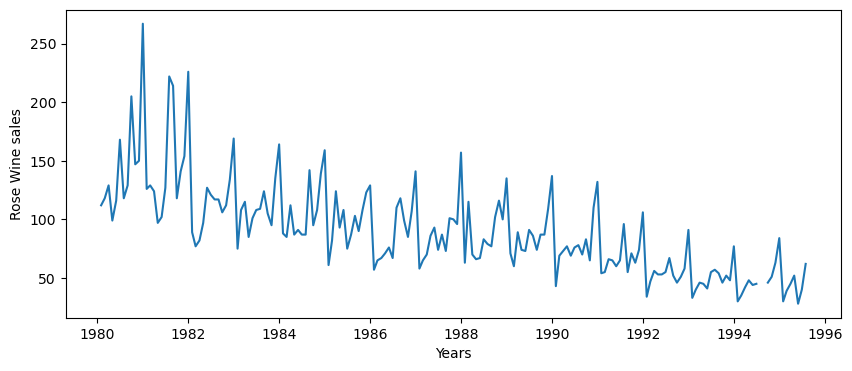

In [192]:
plt.figure(figsize=(10, 4))
plt.plot(df2)
plt.xlabel("Years")
plt.ylabel("Rose Wine sales");

### Missing Value Treatment

In [193]:
df2.isnull().sum()

Rose    2
dtype: int64

In [194]:
df2.loc[df2["Rose"].isnull()]

Rose
1994-07-31   NaN
1994-08-31   NaN

In [195]:
df2.loc["1994"]

Rose
1994-01-31  30.0
1994-02-28  35.0
1994-03-31  42.0
1994-04-30  48.0
1994-05-31  44.0
1994-06-30  45.0
1994-07-31   NaN
1994-08-31   NaN
1994-09-30  46.0
1994-10-31  51.0
1994-11-30  63.0
1994-12-31  84.0

In [196]:
df2.interpolate(inplace=True)
df2.loc['1994'].round(2)

Rose
1994-01-31  30.00
1994-02-28  35.00
1994-03-31  42.00
1994-04-30  48.00
1994-05-31  44.00
1994-06-30  45.00
1994-07-31  45.33
1994-08-31  45.67
1994-09-30  46.00
1994-10-31  51.00
1994-11-30  63.00
1994-12-31  84.00

In [197]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


## Plotting the Time Series data after missing value treatment

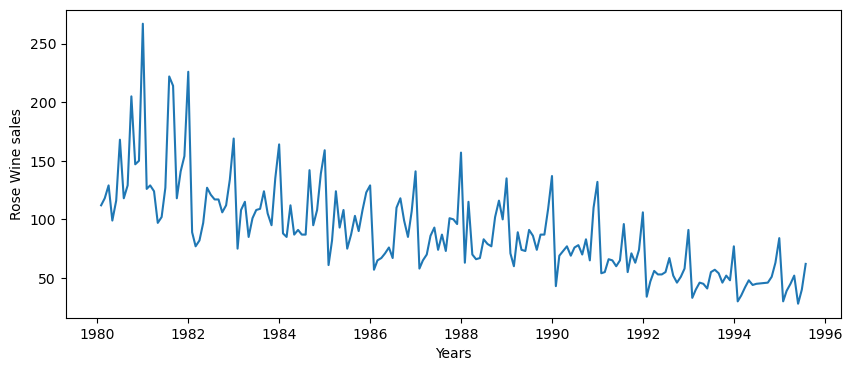

In [198]:
plt.figure(figsize=(10, 4))
plt.plot(df2)
plt.xlabel("Years")
plt.ylabel("Rose Wine sales");

## Exploratory Data Analysis (EDA)

In [199]:
df2.describe()

Rose
count  187.000000
mean    89.914439
std     39.238325
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

In [200]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,5

### Yearly Boxplot

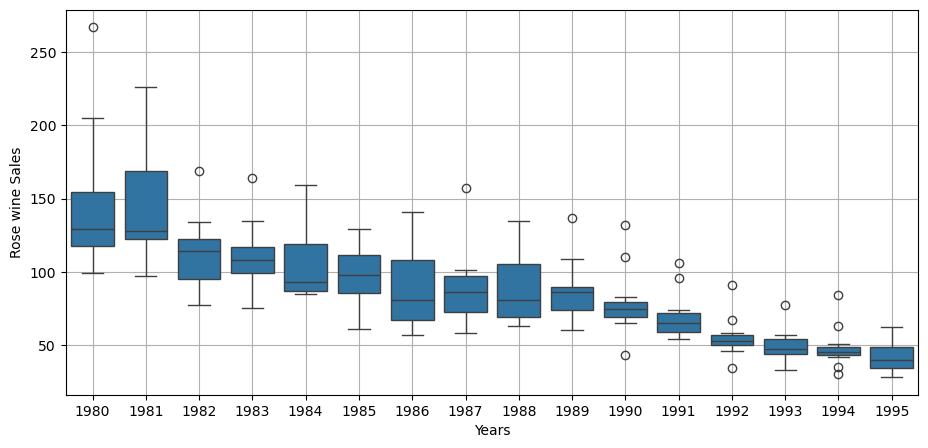

In [201]:
sns.boxplot(x=df2.index.year, y=df2["Rose"])
plt.xlabel("Years")
plt.ylabel("Rose wine Sales")
plt.grid();

### Monthly Plot

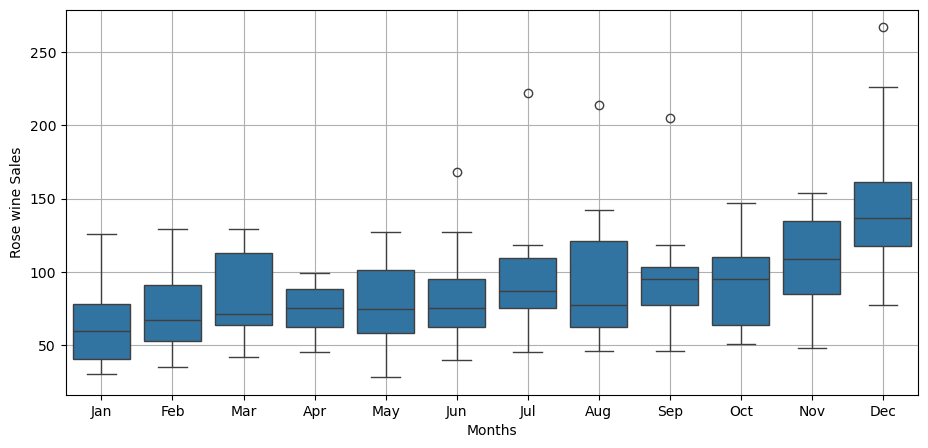

In [202]:
sns.boxplot(x = df2.index.strftime('%b'), y =df2["Rose"])
plt.xlabel("Months")
plt.ylabel("Rose wine Sales")
plt.grid();

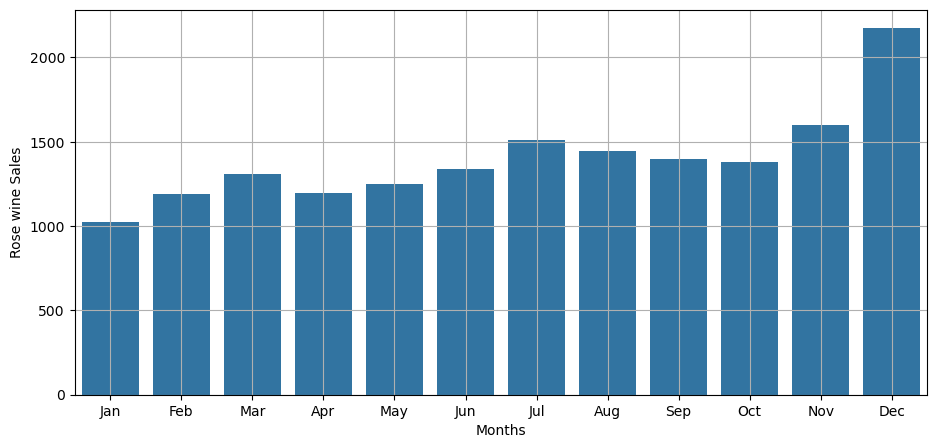

In [203]:
sns.barplot(x = df2.index.strftime('%b'), y =df2["Rose"], estimator=sum, errorbar=None)
plt.xlabel("Months")
plt.ylabel("Rose wine Sales")
plt.grid();

### Time series Month-plot

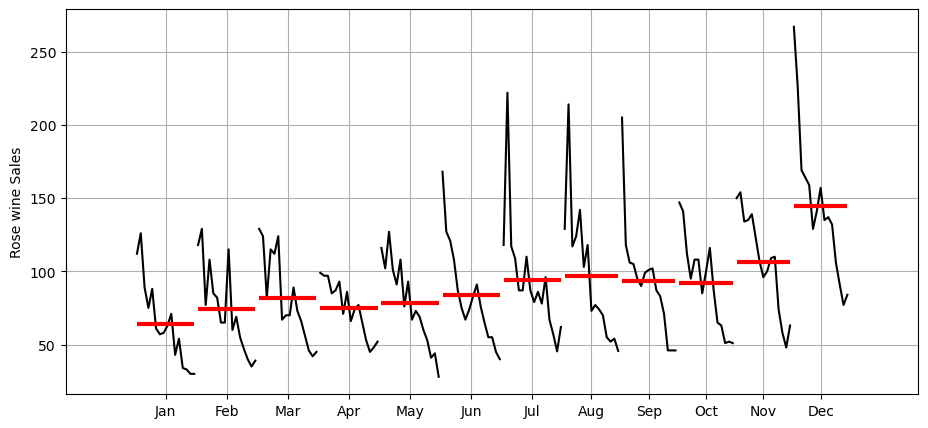

In [204]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df2['Rose'],ylabel='Rose wine Sales')
plt.grid();

### Monthly sales

In [205]:
monthly_sales_across_years = pd.pivot_table(df2, values = 'Rose', columns = df2.index.strftime('%b'), index = df2.index.year)
monthly_sales_across_years

Apr         Aug    Dec    Feb    Jan         Jul    Jun    Mar    May  \
1980  99.0  129.000000  267.0  118.0  112.0  118.000000  168.0  129.0  116.0   
1981  97.0  214.000000  226.0  129.0  126.0  222.000000  127.0  124.0  102.0   
1982  97.0  117.000000  169.0   77.0   89.0  117.000000  121.0   82.0  127.0   
1983  85.0  124.000000  164.0  108.0   75.0  109.000000  108.0  115.0  101.0   
1984  87.0  142.000000  159.0   85.0   88.0   87.000000   87.0  112.0   91.0   
1985  93.0  103.000000  129.0   82.0   61.0   87.000000   75.0  124.0  108.0   
1986  71.0  118.000000  141.0   65.0   57.0  110.000000   67.0   67.0   76.0   
1987  86.0   73.000000  157.0   65.0   58.0   87.000000   74.0   70.0   93.0   
1988  66.0   77.000000  135.0  115.0   63.0   79.000000   83.0   70.0   67.0   
1989  74.0   74.000000  137.0   60.0   71.0   86.000000   91.0   89.0   73.0   
1990  77.0   70.000000  132.0   69.0   43.0   78.000000   76.0   73.0   69.0   
1991  65.0   55.000000  106.0   55.0   54.0   96.000000   65.0   66.0   60.0   
1992  53.0   52.000000   91.0   47.0   34.0   67.000000   55.0   56.0   53.0   
1993  45.0   54.000000   77.0   40.0   33.0   57.000000   55.0   46.0   41.0   
1994  48.0   45.666667   84.0   35.0   30.0   45.333333   45.0   42.0   44.0   
1995  52.0         NaN    NaN   39.0   30.0   62.000000   40.0   45.0   28.0   

        Nov    Oct    Sep  
1980  150.0  147.0  205.0  
1981  154.0  141.0  118.0  
1982  134.0  112.0  106.0  
1983  135.0   95.0  105.0  
1984  139.0  108.0   95.0  
1985  123.0  108.0   90.0  
1986  107.0   85.0   99.0  
1987   96.0  100.0  101.0  
1988  100.0  116.0  102.0  
1989  109.0   87.0   87.0  
1990  110.0   65.0   83.0  
1991   74.0   63.0   71.0  
1992   58.0   51.0   46.0  
1993   48.0   52.0   46.0  
1994   63.0   51.0   46.0  
1995    NaN    NaN    NaN

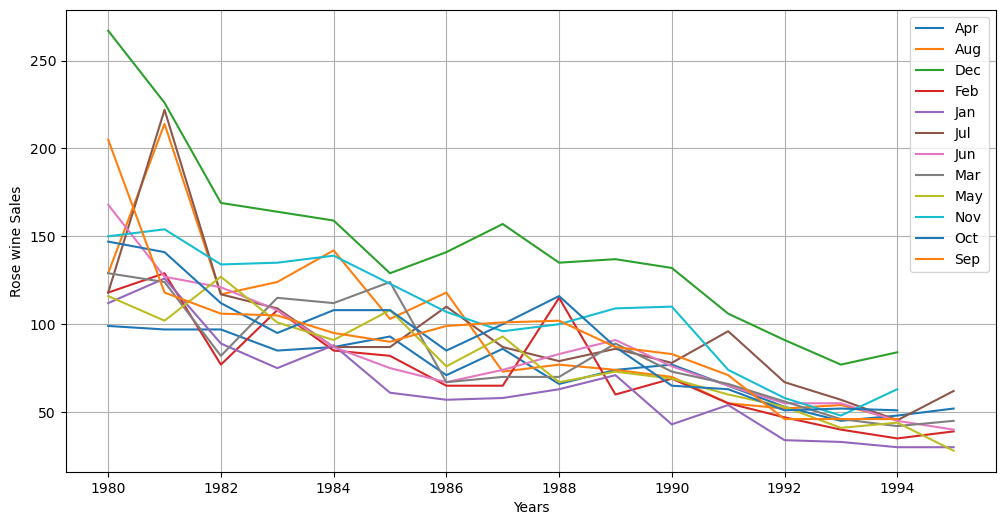

In [206]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,6
monthly_sales_across_years.plot()
plt.xlabel("Years")
plt.ylabel("Rose wine Sales")
plt.grid()
plt.legend(loc='best');

### Empirical Cumulative Distribution

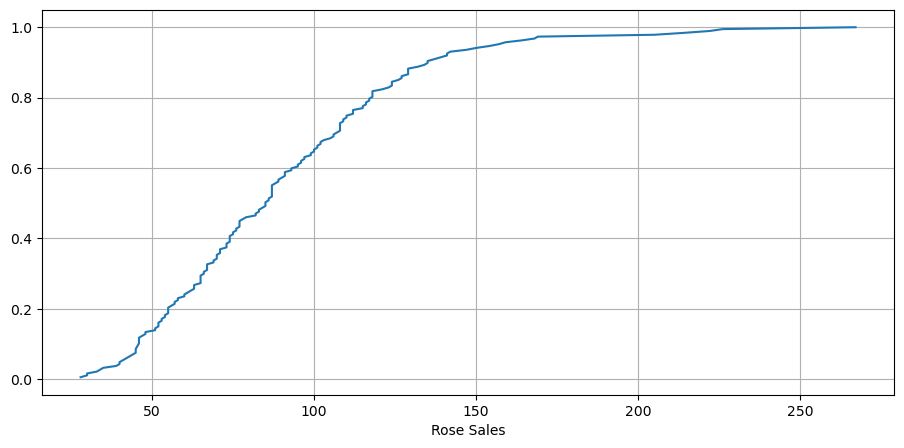

In [207]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (11, 5))
cdf = ECDF(df2['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Rose Sales');

### Average Sales and Percent change

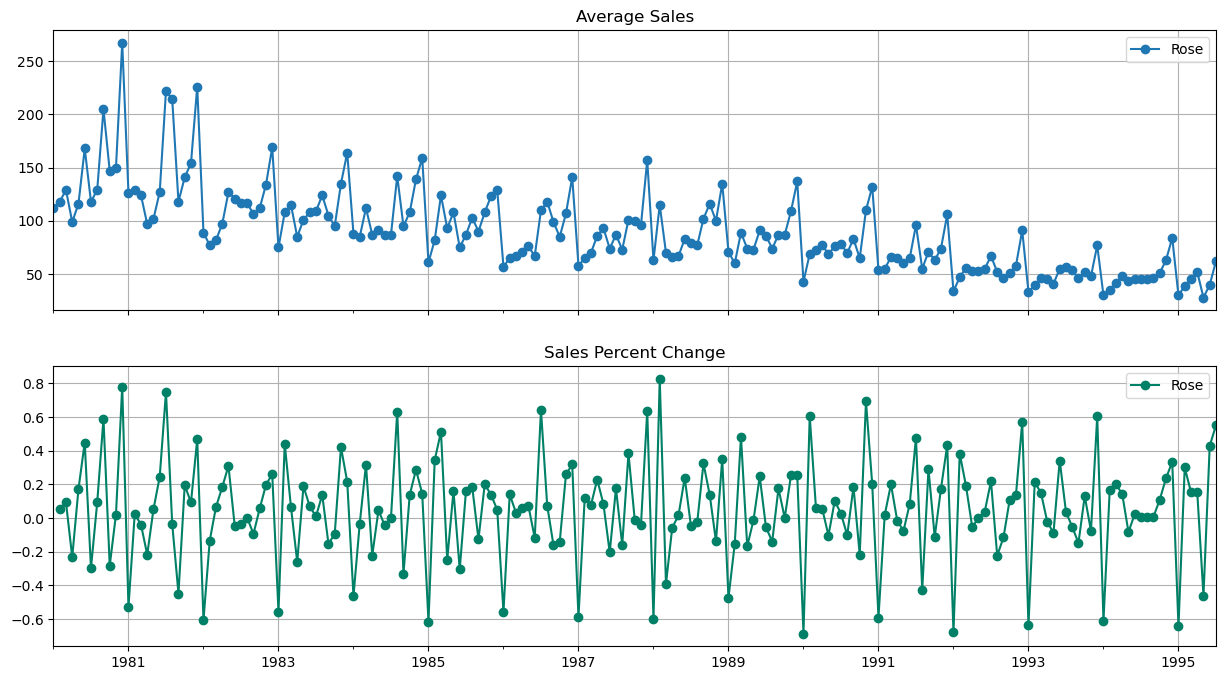

In [208]:
# group by date and get average RetailSales, and precent change
average    = df2.groupby(df2.index)["Rose"].mean()
pct_change = df2.groupby(df2.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

### TIME SERIES DECOMPOSITION

### Additive Decomposition

In [209]:
plt.rcParams["figure.figsize"] = (9, 6)

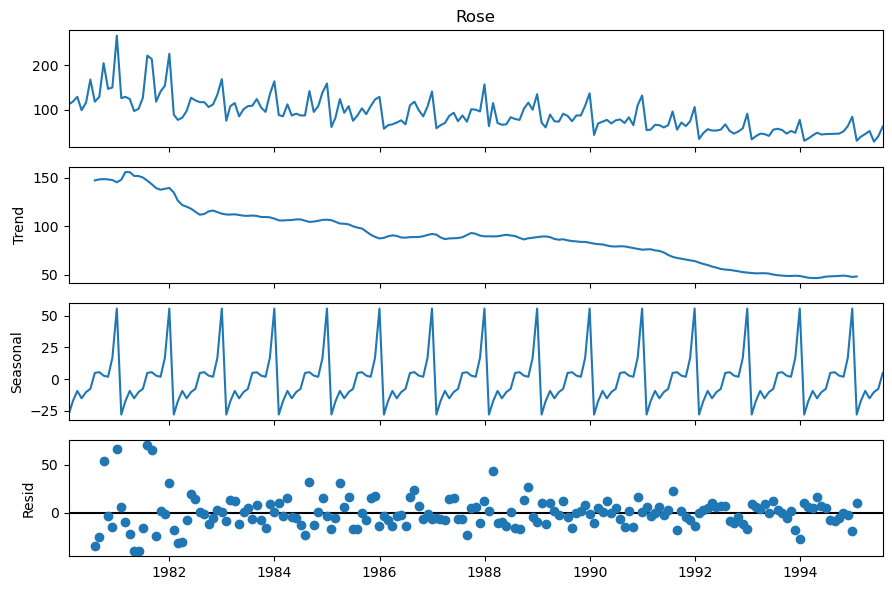

In [210]:
decomposition = sm.tsa.seasonal_decompose(df2['Rose'], model='additive')
decomposition.plot();

In [211]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Freq: M, Name: trend, dtype: float64 

Seasonality 
 1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
1980-06-30    -7.678687
1980-07-31     4.896908
1980-08-31     5.499686
1980-09-30     2.774686
1980-10-31     1.871908
1980-11-30    16.846908
1980-12-31    55.713575
Freq: M, Name: seasonal, dtype: float64 

Residual 
 1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980241
1980-08-31   -24.624686
1980-09-30    53.850314
1980-10-31    -2.955241
1980-11-30   -14.263575
1980-12-31    66.161425
Freq: M, N

### Multiplicative Decomposition

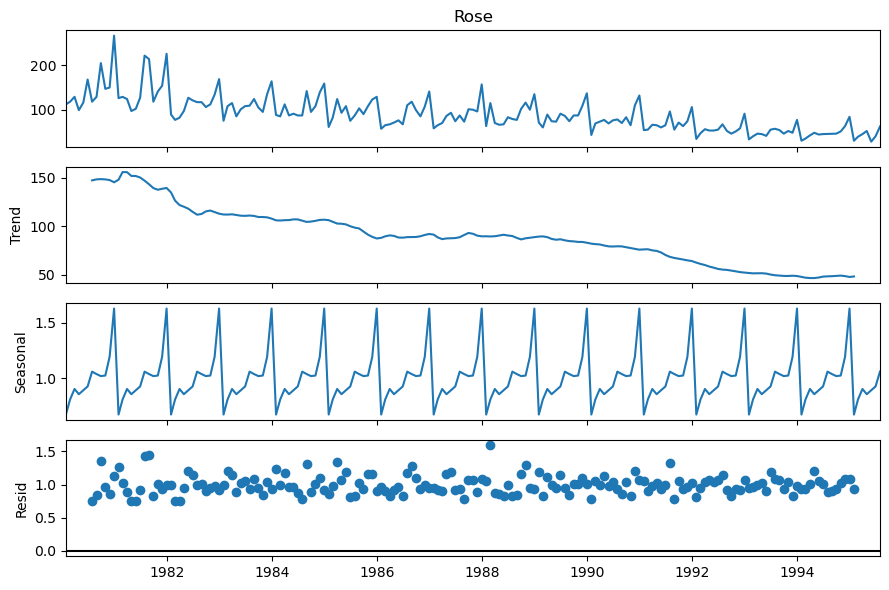

In [212]:
decomposition = sm.tsa.seasonal_decompose(df2['Rose'], model='multiplicative')
decomposition.plot();

In [213]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Freq: M, Name: trend, dtype: float64 

Seasonality 
 1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Freq: M, Name: seasonal, dtype: float64 

Residual 
 1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Freq: M, Name: resid, dtype: float

## Data Pre-processing

### Missing value treatment

In [214]:
df2.isnull().sum()

Rose    0
dtype: int64

Missing values are already treated before time series decomposition

### Train-Test Split

In [215]:
train=df2[df2.index.year < 1991]
test=df2[df2.index.year >= 1991]

In [216]:
from IPython.display import display

print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Last few rows of Training Data


Rose
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

First few rows of Test Data


Rose
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

Last few rows of Test Data


Rose
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

In [217]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


### Visualizing the train-test data

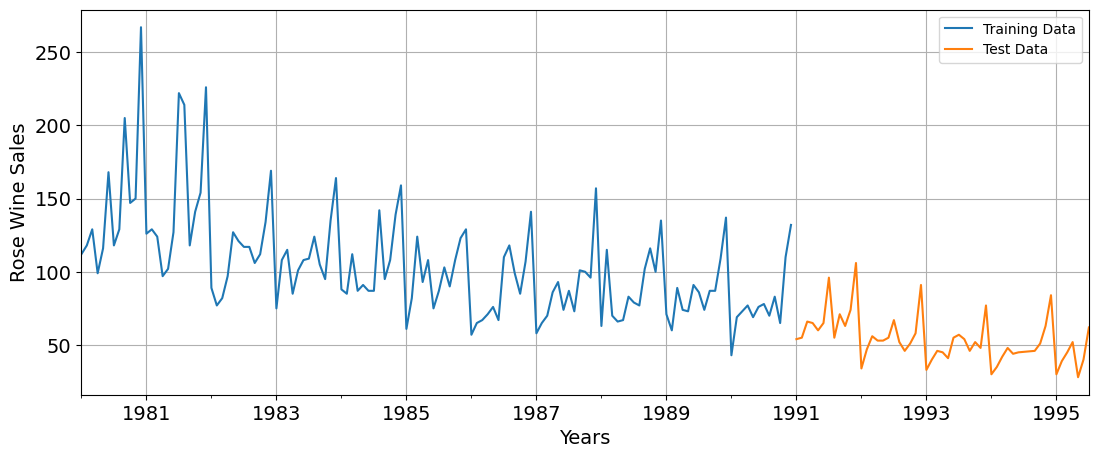

In [218]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.xlabel("Years",fontsize=14)
plt.ylabel("Rose Wine Sales",fontsize=14)
plt.show()

## Model Building

## Model 1: Linear Regression

In [219]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [220]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [221]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [222]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

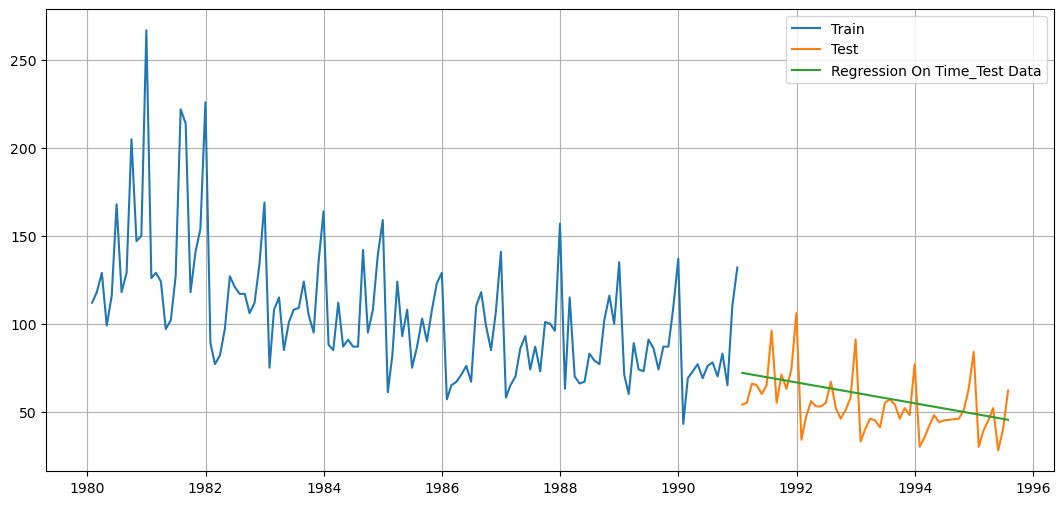

In [223]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [224]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269 


D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [225]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression Model'])
resultsDf

Test RMSE
Linear Regression Model  15.268955

## Model 2: Simple Average

In [226]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [227]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

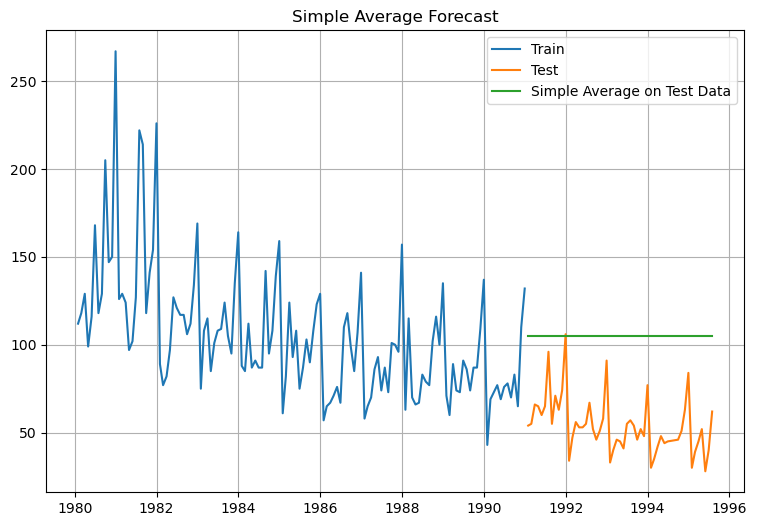

In [228]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [229]:
rmse_model3_test = metrics.root_mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [230]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression Model  15.268955
SimpleAverageModel       53.460570

## Model 3: Moving Average

In [231]:
MovingAverage = df2.copy()
MovingAverage.head()

Rose
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

#### Trailing moving averages

In [232]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0       114.5         NaN         NaN
1980-05-31  116.0       107.5       115.5         NaN         NaN

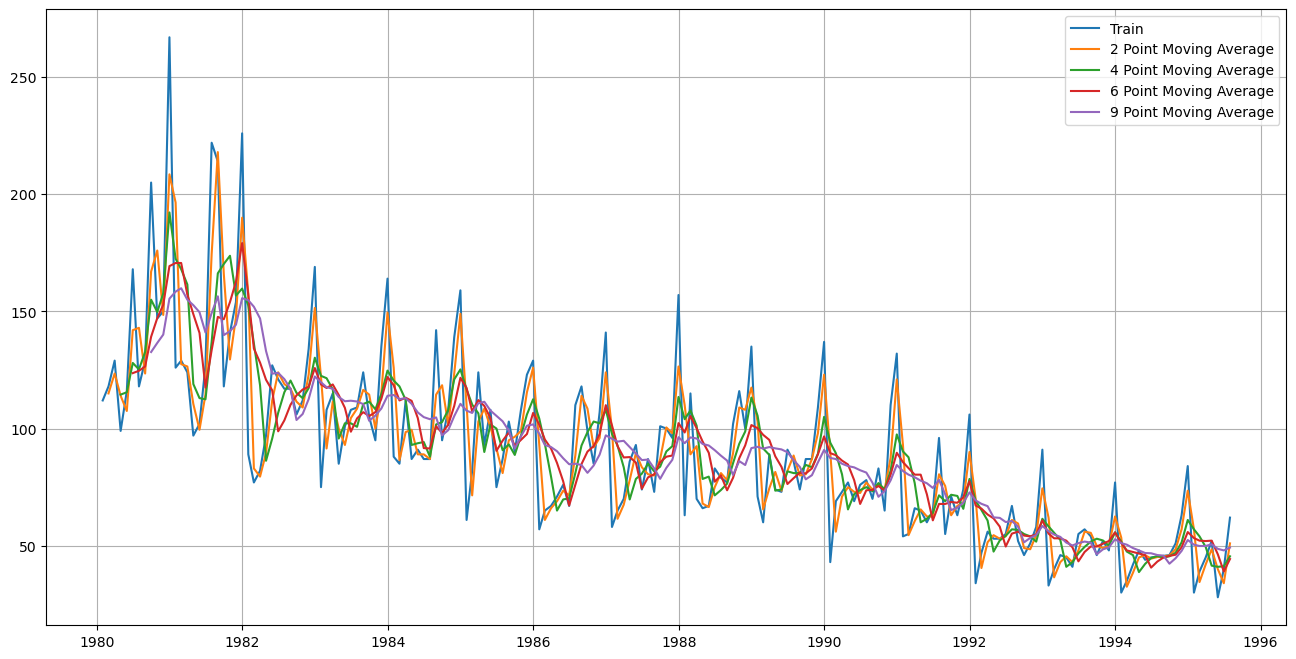

In [233]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [234]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

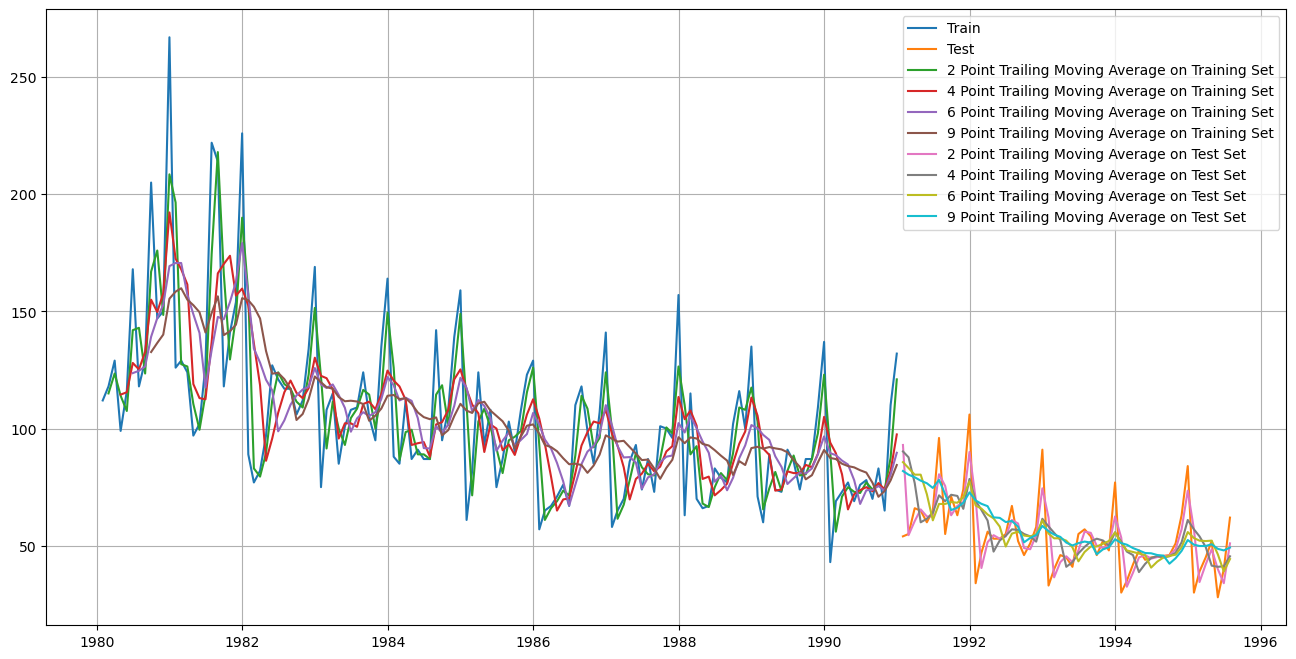

In [235]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

In [236]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.root_mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.root_mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.root_mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.root_mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728 


In [237]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2-point Trailing MovingAverage','4-point Trailing MovingAverage'
                                   ,'6-point Trailing MovingAverage','9-point Trailing MovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
Linear Regression Model         15.268955
SimpleAverageModel              53.460570
2-point Trailing MovingAverage  11.529278
4-point Trailing MovingAverage  14.451403
6-point Trailing MovingAverage  14.566327
9-point Trailing MovingAverage  14.727630

## Model 4: Simple Exponential Smoothing

In [238]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [239]:
SES_train = train.copy()
SES_test = test.copy()

In [240]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [241]:
model_SES_autofit = model_SES.fit(optimized=True)

In [242]:
model_SES_autofit.params

{'smoothing_level': 0.12362013466760018,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [243]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Rose    predict
1991-01-31  54.0  87.983765
1991-02-28  55.0  87.983765
1991-03-31  66.0  87.983765
1991-04-30  65.0  87.983765
1991-05-31  60.0  87.983765

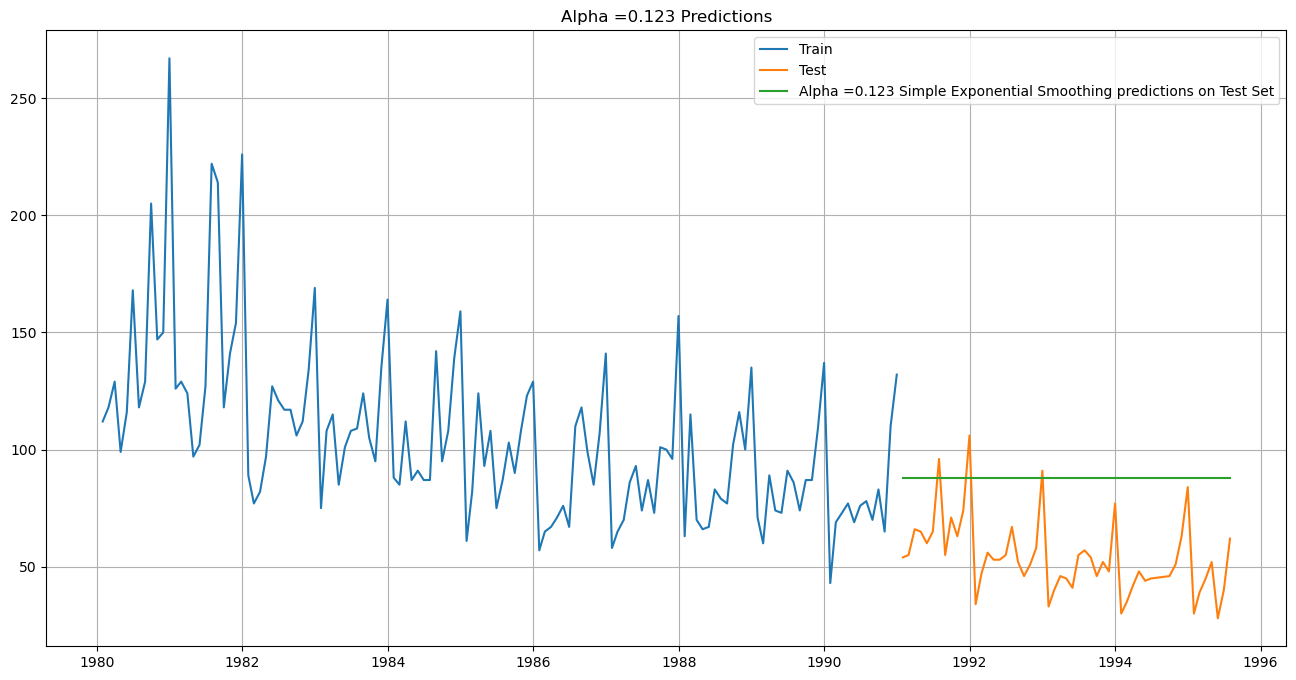

In [244]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.123 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.123 Predictions');

### Model Evaluation for $\alpha$ = 0.123 : Simple Exponential Smoothing

In [245]:
## Test Data

rmse_model5_test_1 = metrics.root_mean_squared_error(SES_test['Rose'],SES_test['predict'])
print("For Alpha =0.123 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.123 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 37.592


In [246]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.123,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
Linear Regression Model                 15.268955
SimpleAverageModel                      53.460570
2-point Trailing MovingAverage          11.529278
4-point Trailing MovingAverage          14.451403
6-point Trailing MovingAverage          14.566327
9-point Trailing MovingAverage          14.727630
Alpha=0.123,SimpleExponentialSmoothing  37.592212

### Iterating with different alpha values to understand which particular value works best for alpha on the test set.

In [247]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [248]:
for i in np.arange(0.1,1,0.05):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = metrics.root_mean_squared_error(SES_train['Rose'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.root_mean_squared_error(SES_test['Rose'],SES_test['predict',i])
    
    new_row = pd.DataFrame({'Alpha Values': [i], 
                        'Train RMSE': [rmse_model5_train_i], 
                        'Test RMSE': [rmse_model5_test_i]})

    resultsDf_6 = pd.concat([resultsDf_6, new_row], ignore_index=True)

### Model Evaluation

In [249]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
0           0.10   31.815610  36.828033
1           0.15   31.809845  38.722125
2           0.20   31.979391  41.361876
3           0.25   32.211871  44.360796
4           0.30   32.470164  47.504821
5           0.35   32.744341  50.665672
6           0.40   33.035130  53.767406
7           0.45   33.346578  56.767133
8           0.50   33.682839  59.641786
9           0.55   34.047042  62.378989
10          0.60   34.441171  64.971288
11          0.65   34.866356  67.412903
12          0.70   35.323261  69.698162
13          0.75   35.812435  71.820852
14          0.80   36.334596  73.773992
15          0.85   36.890835  75.549736
16          0.90   37.482782  77.139276
17          0.95   38.112735  78.532696

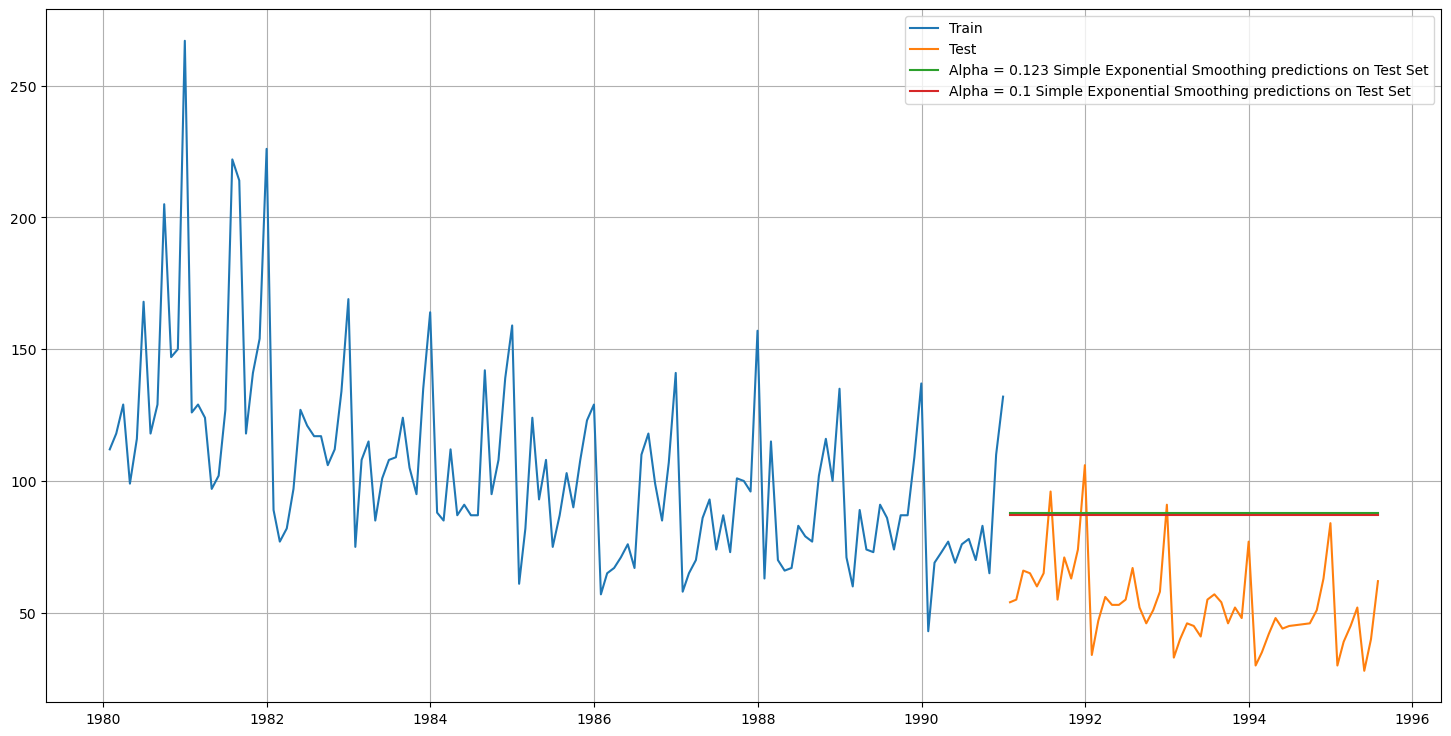

In [250]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha = 0.123 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha = 0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [251]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
Linear Regression Model                 15.268955
SimpleAverageModel                      53.460570
2-point Trailing MovingAverage          11.529278
4-point Trailing MovingAverage          14.451403
6-point Trailing MovingAverage          14.566327
9-point Trailing MovingAverage          14.727630
Alpha=0.123,SimpleExponentialSmoothing  37.592212
Alpha=0.1,SimpleExponentialSmoothing    36.828033

## Model 5: Double Exponential Smoothing (Holt's Model)

In [252]:
DES_train = train.copy()
DES_test = test.copy()

In [253]:
model_DES = Holt(DES_train['Rose'])

In [254]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [255]:
for i in np.arange(0.1,1.1,0.05):
    for j in np.arange(0.1,1.1,0.05):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model6_train = metrics.root_mean_squared_error(DES_train['Rose'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.root_mean_squared_error(DES_test['Rose'],DES_test['predict',i,j])
        
        new_row = pd.DataFrame({'Alpha Values': [i],
                                'Beta Values':[j],
                        'Train RMSE': [rmse_model6_train], 
                        'Test RMSE': [rmse_model6_test]})

        resultsDf_7 = pd.concat([resultsDf_7, new_row], ignore_index=True)

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\1257650852.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\1257650852.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\1257650852.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\1257650852.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\1257650852.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\1257650852.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\1257650852.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\1257650852.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\1257650852.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\1257650852.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\1257650852.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\1257650852.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\1257650852.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\1257650852.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\1257650852.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\1257650852.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\1257650852.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\1257650852.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\1257650852.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\1257650852.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\1257650852.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

In [256]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
0           0.10         0.10   34.439111  36.923416
1           0.10         0.15   33.760342  40.330993
2           0.10         0.20   33.450729  48.688648
20          0.15         0.10   33.194685  49.752394
21          0.15         0.15   33.063387  63.759307

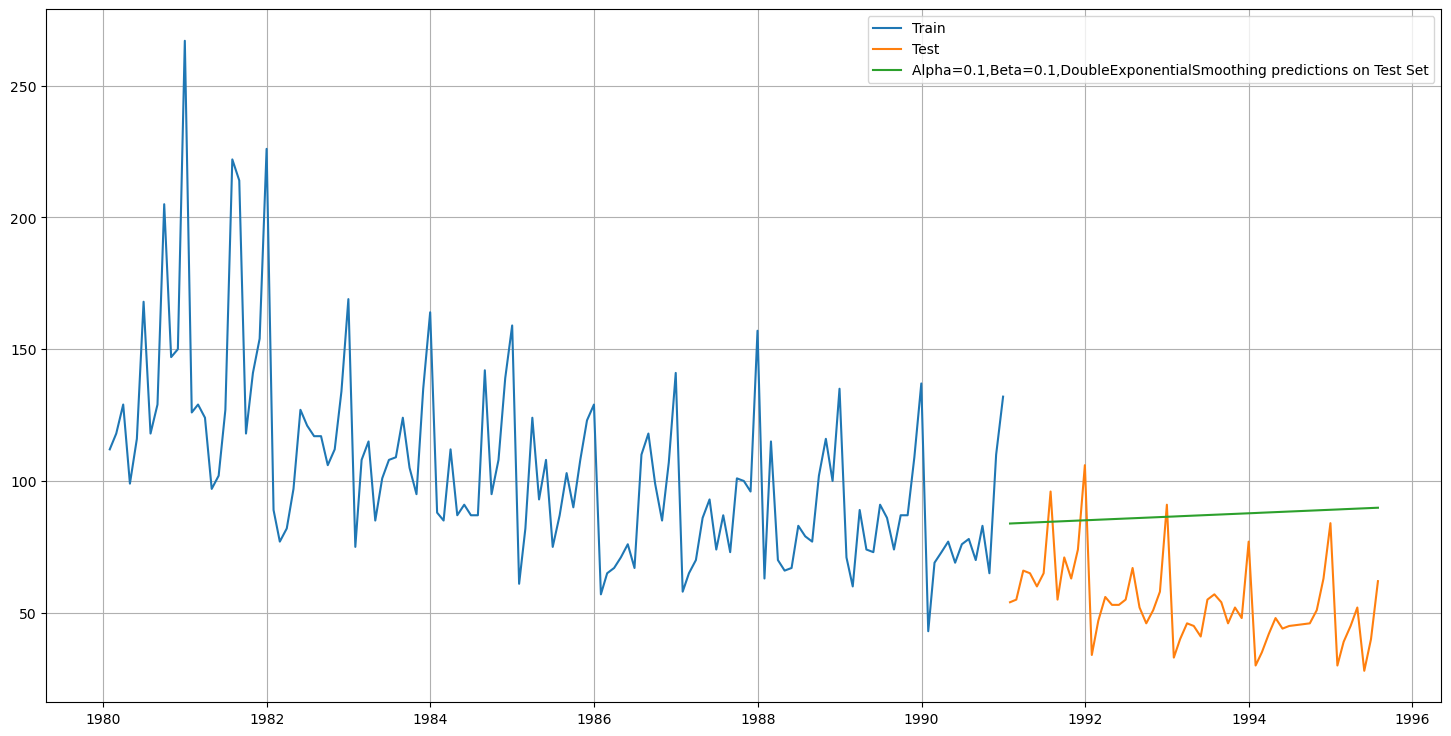

In [257]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [258]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
Linear Regression Model                        15.268955
SimpleAverageModel                             53.460570
2-point Trailing MovingAverage                 11.529278
4-point Trailing MovingAverage                 14.451403
6-point Trailing MovingAverage                 14.566327
9-point Trailing MovingAverage                 14.727630
Alpha=0.123,SimpleExponentialSmoothing         37.592212
Alpha=0.1,SimpleExponentialSmoothing           36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  36.923416

## Model 6: Triple Exponential Smoothing (Holt - Winter's Model)

In [259]:
TES_train = train.copy()
TES_test = test.copy()

In [260]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [261]:
model_TES_autofit = model_TES.fit()

In [262]:
model_TES_autofit.params

{'smoothing_level': 0.07736040004765096,
 'smoothing_trend': 0.03936496779735522,
 'smoothing_seasonal': 0.0008375039104357999,
 'damping_trend': nan,
 'initial_level': 156.90674503596637,
 'initial_trend': -0.9061396720042346,
 'initial_seasons': array([0.7142168 , 0.80982439, 0.88543128, 0.77363782, 0.87046319,
        0.94699283, 1.04196135, 1.11012703, 1.04835489, 1.0276963 ,
        1.19783562, 1.6514144 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [263]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Rose  auto_predict
1991-01-31  54.0     55.942246
1991-02-28  55.0     63.240624
1991-03-31  66.0     68.899674
1991-04-30  65.0     60.007486
1991-05-31  60.0     67.257150

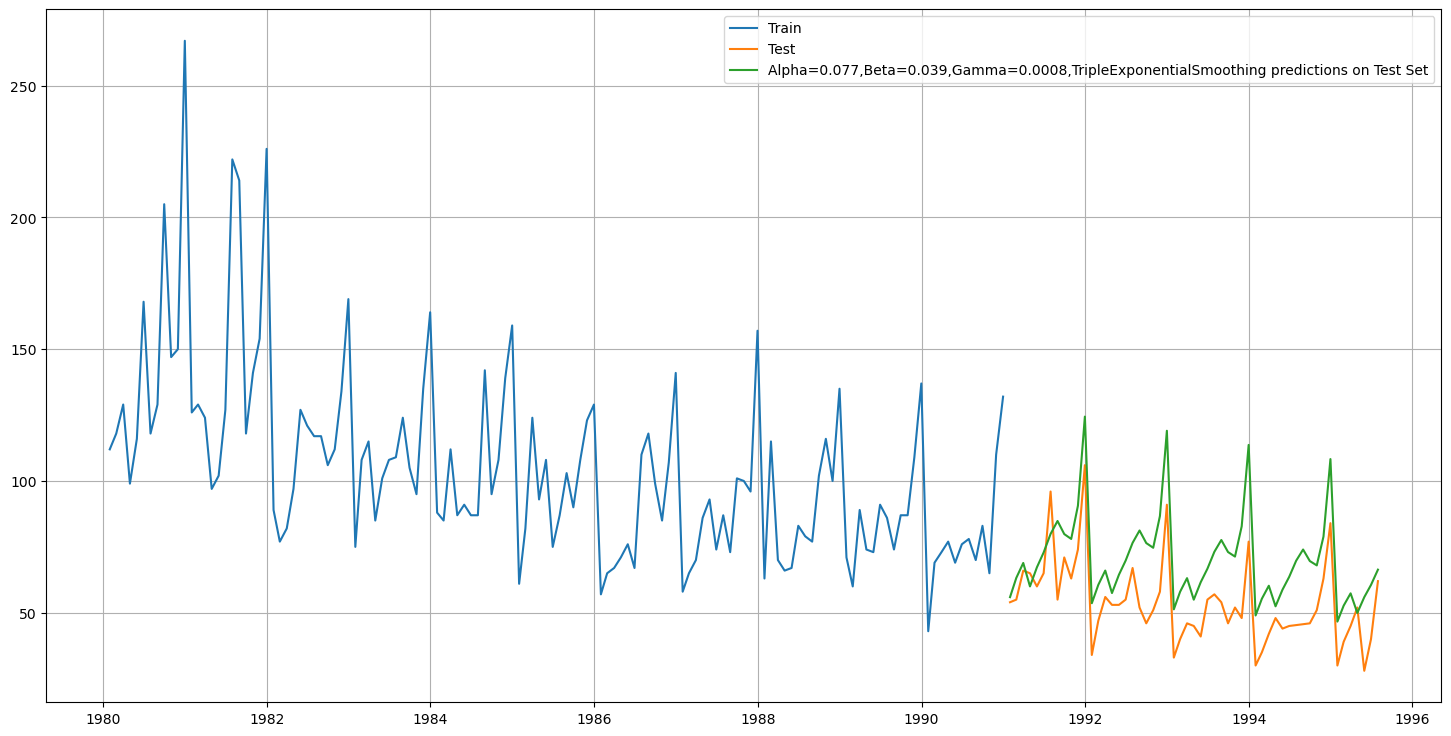

In [264]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.077,Beta=0.039,Gamma=0.0008,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [265]:
## Test Data

rmse_model6_test_1 = metrics.root_mean_squared_error(TES_test['Rose'],TES_test['auto_predict'])
print("For Alpha=0.077,Beta=0.039,Gamma=0.0008, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.077,Beta=0.039,Gamma=0.0008, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 19.113


In [266]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.077,Beta=0.039,Gamma=0.0008,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
Linear Regression Model                             15.268955
SimpleAverageModel                                  53.460570
2-point Trailing MovingAverage                      11.529278
4-point Trailing MovingAverage                      14.451403
6-point Trailing MovingAverage                      14.566327
9-point Trailing MovingAverage                      14.727630
Alpha=0.123,SimpleExponentialSmoothing              37.592212
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
Alpha=0.077,Beta=0.039,Gamma=0.0008,TripleExpon...  19.113110

In [267]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [268]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = metrics.root_mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k])
            
            rmse_model8_test = metrics.root_mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k])
            
            new_row = pd.DataFrame({'Alpha Values': [i],
                                    'Beta Values':[j],
                                    'Gamma Values':k,
                                    'Train RMSE': [rmse_model8_train], 
                                    'Test RMSE': [rmse_model8_test]})

            resultsDf_8_2 = pd.concat([resultsDf_8_2, new_row], ignore_index=True)

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_22428\536349096.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

In [269]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
10            0.1          0.2           0.1   19.770392   9.223504
11            0.1          0.2           0.2   20.253487   9.496152
151           0.2          0.6           0.2   23.129850   9.565988
12            0.1          0.2           0.3   20.871304   9.888106
142           0.2          0.5           0.3   23.656276   9.891550

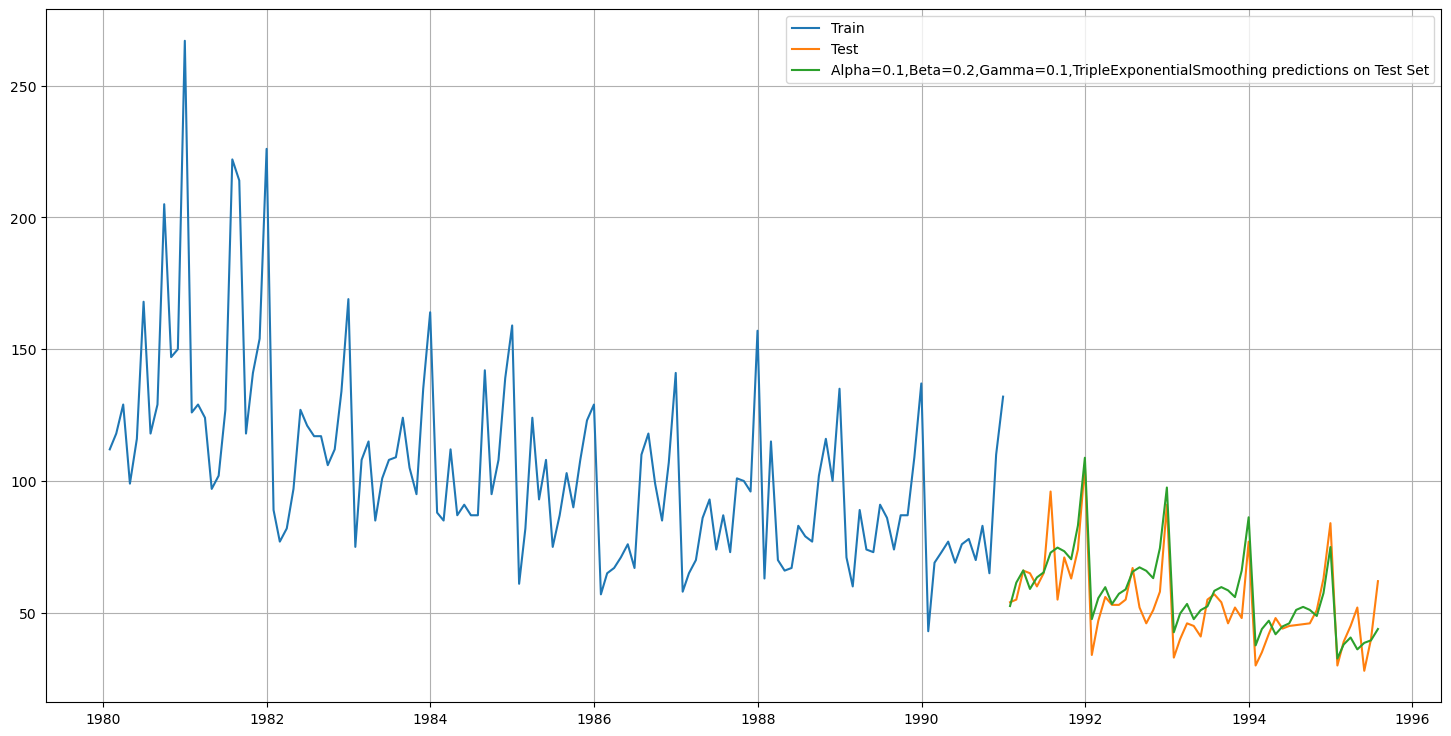

In [270]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.1, 0.2, 0.1], label='Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [271]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
Linear Regression Model                             15.268955
SimpleAverageModel                                  53.460570
2-point Trailing MovingAverage                      11.529278
4-point Trailing MovingAverage                      14.451403
6-point Trailing MovingAverage                      14.566327
9-point Trailing MovingAverage                      14.727630
Alpha=0.123,SimpleExponentialSmoothing              37.592212
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
Alpha=0.077,Beta=0.039,Gamma=0.0008,TripleExpon...  19.113110
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...   9.223504

In [272]:
resultsDf.sort_values(by=["Test RMSE"])

Test RMSE
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...   9.223504
2-point Trailing MovingAverage                      11.529278
4-point Trailing MovingAverage                      14.451403
6-point Trailing MovingAverage                      14.566327
9-point Trailing MovingAverage                      14.727630
Linear Regression Model                             15.268955
Alpha=0.077,Beta=0.039,Gamma=0.0008,TripleExpon...  19.113110
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
Alpha=0.123,SimpleExponentialSmoothing              37.592212
SimpleAverageModel                                  53.460570

### We see that the best model is the Triple Exponential Smoothing  with the parameters $\alpha$ = 0.1, $\beta$ = 0.2 and $\gamma$ = 0.1 with the test RMSE score of 9.22

## Plotting LinearRegression, Simple Average and Moving Average Predictions

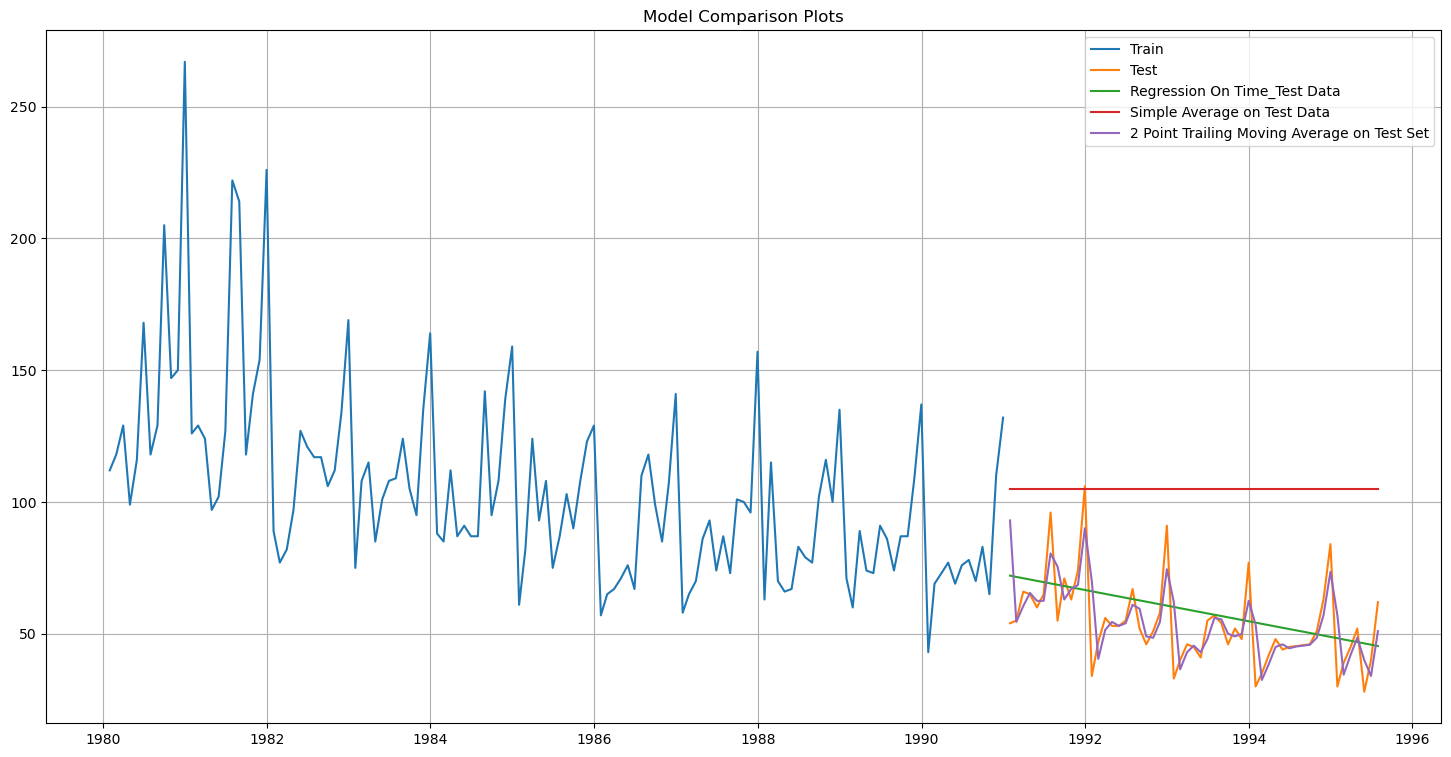

In [273]:
## Plotting on both Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Plotting Exponential Smoothing Predictions

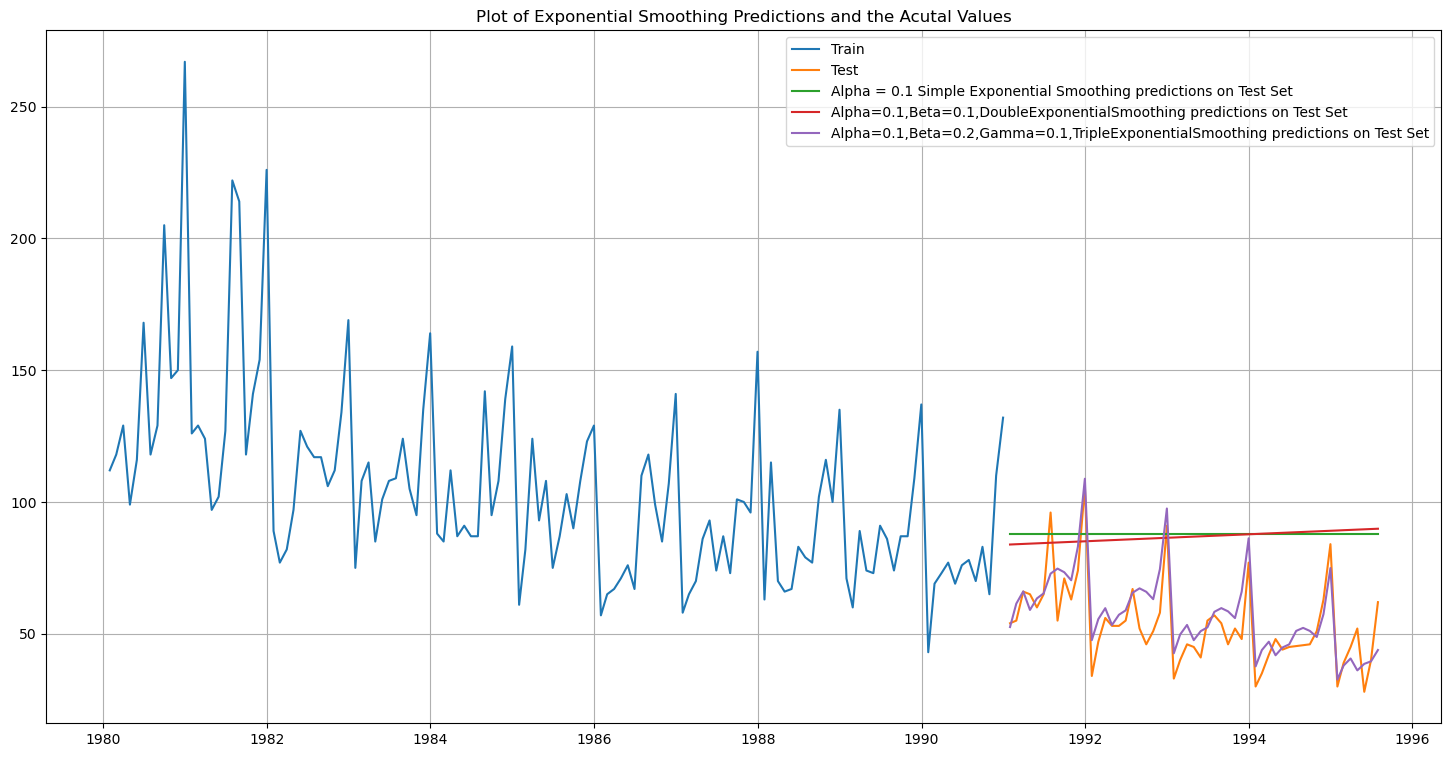

In [274]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha = 0.1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.1, 0.2, 0.1], label='Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

## Check for Stationarity

### Check for stationarity of the whole Time Series data

In [275]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

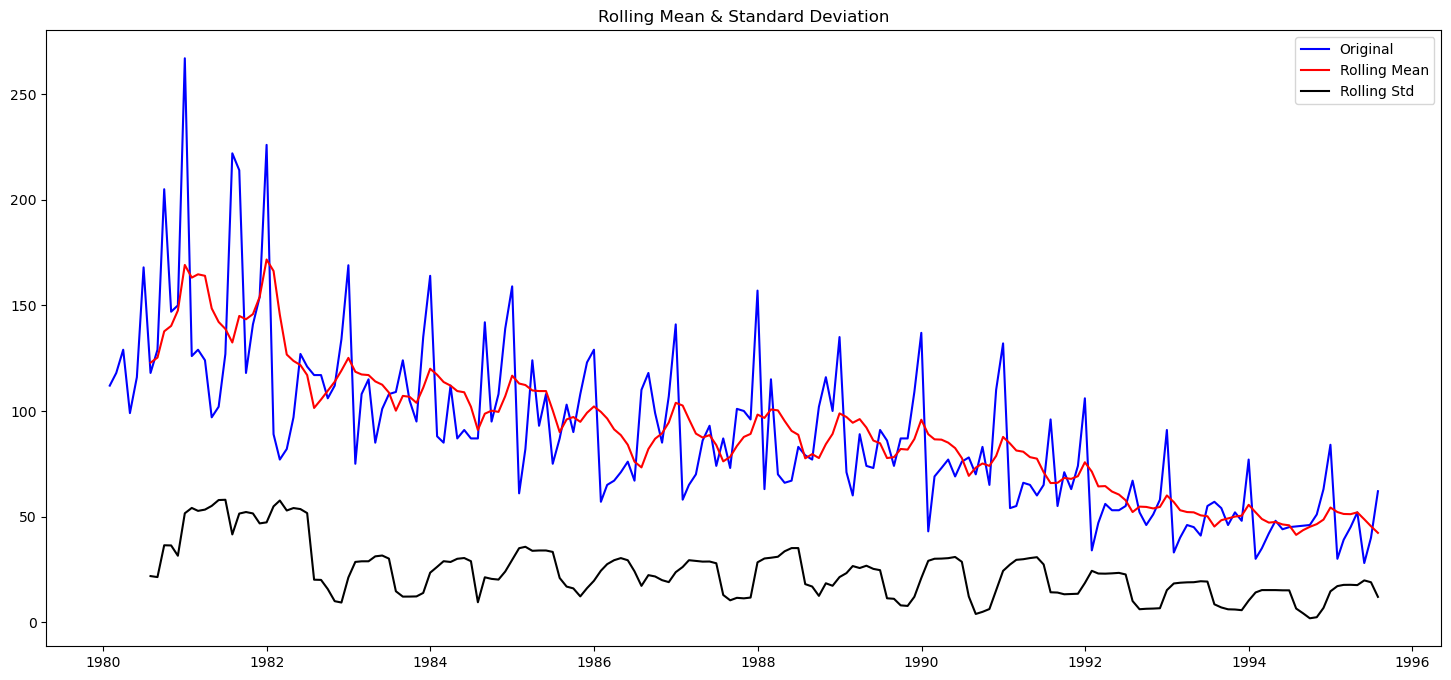

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [276]:
plt.figure(figsize=(18,8))
test_stationarity(df2['Rose'])

Since the p-value is 0.343, which is much greater than 0.05 at 5% significance level, the Time Series is non-stationary

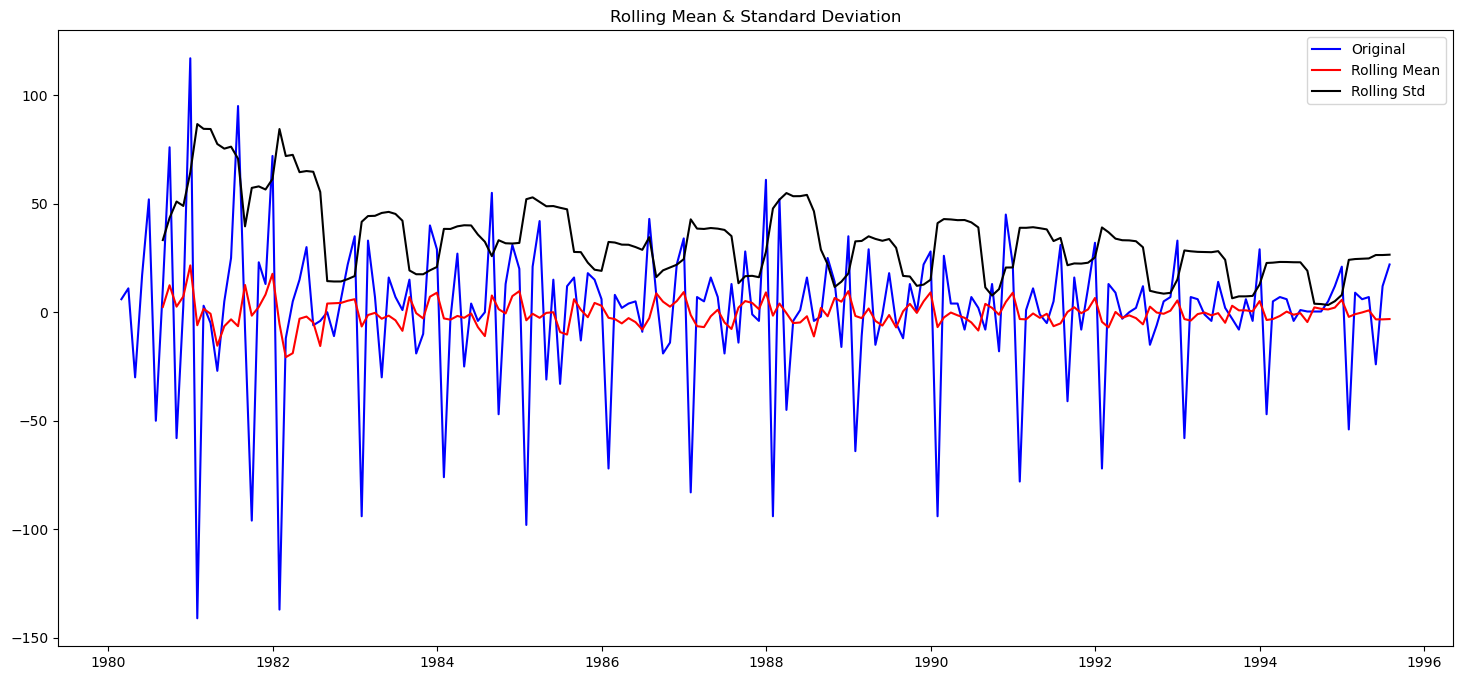

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [277]:
plt.figure(figsize=(18,8))
test_stationarity(df2['Rose'].diff(periods=1).dropna())

After taking a difference of order 1, we see that at $\alpha$ = 0.05,the Time Series is stationary.

### Check for stationarity of the Training data

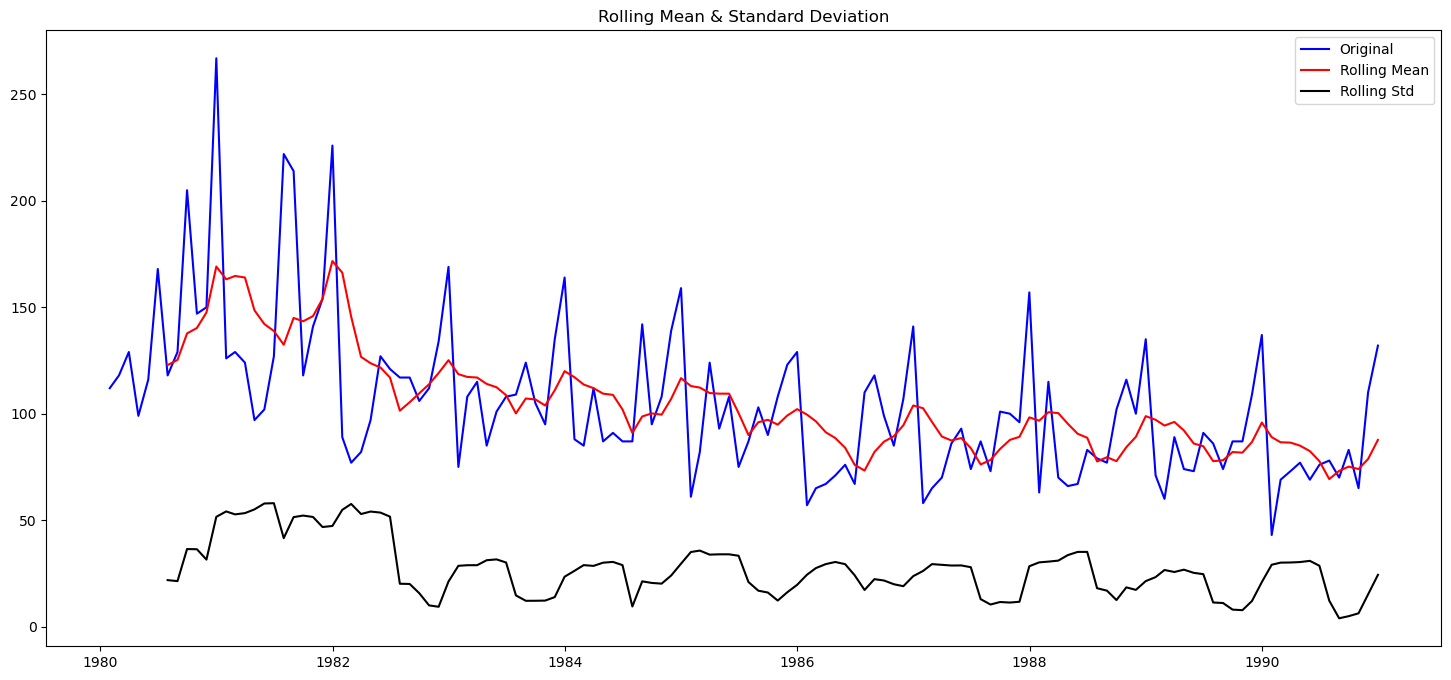

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [278]:
plt.figure(figsize=(18,8))
test_stationarity(train['Rose'])

Since the p-value is 0.21, which is much greater than 0.05 at 5% significance level, the Time Series is non-stationary

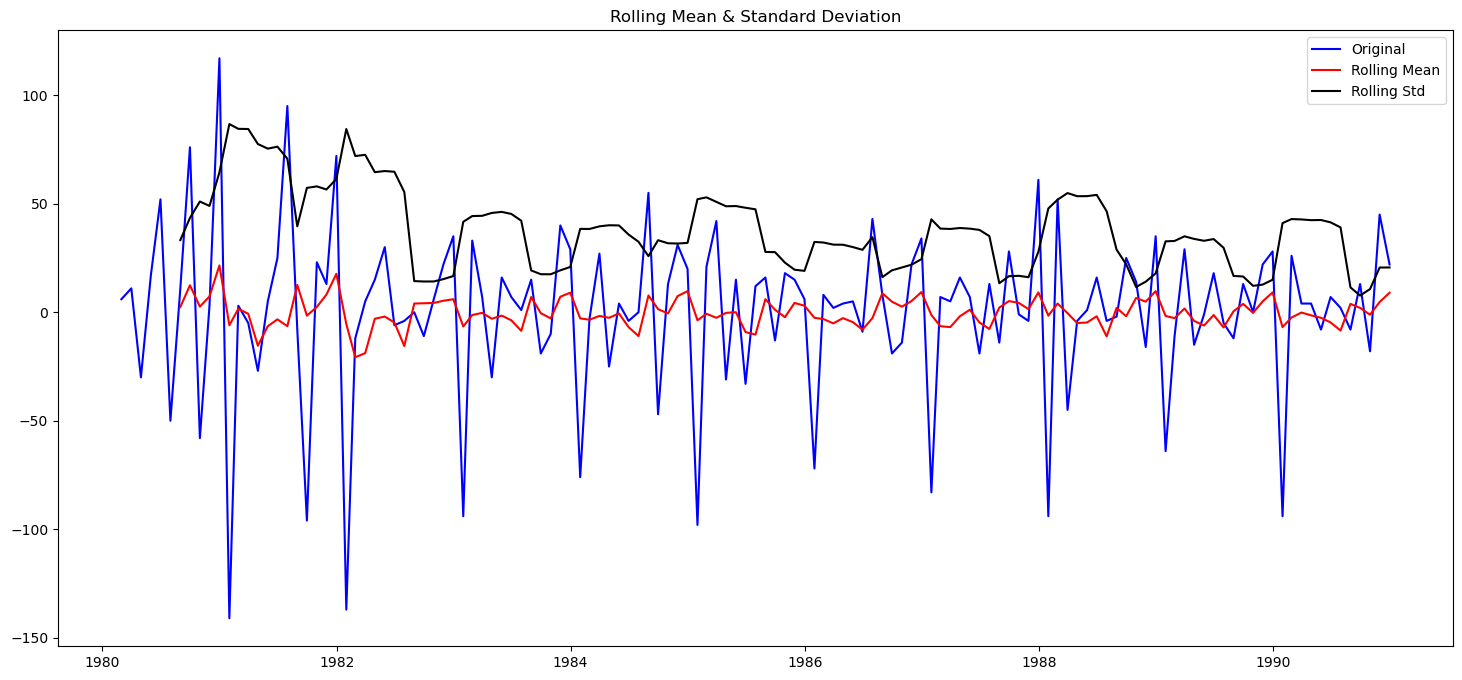

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [279]:
plt.figure(figsize=(18,8))
test_stationarity(train['Rose'].diff(periods=1).dropna())

After taking a difference of order 1, we see that at $\alpha$ = 0.05, the Time Series is stationary.

# Model Building - Stationary Data

## Plotting ACF and PACF plots on the whole Time series data (Stationary).

In [280]:
plt.rcParams["figure.figsize"] = (9,6)

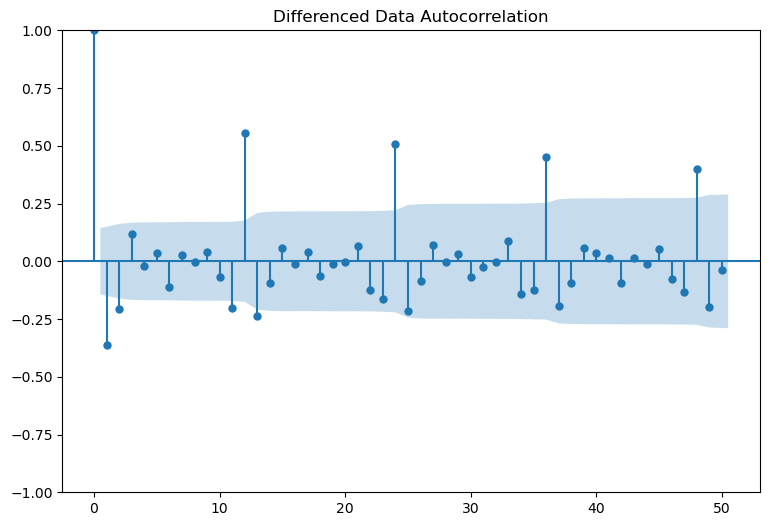

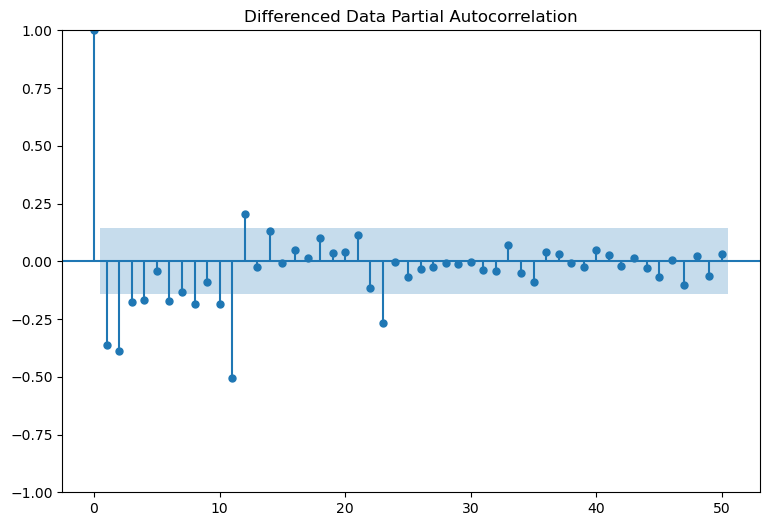

In [281]:
plot_acf(df2['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df2['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

## Plotting ACF and PACF plots on the training data(stationary).

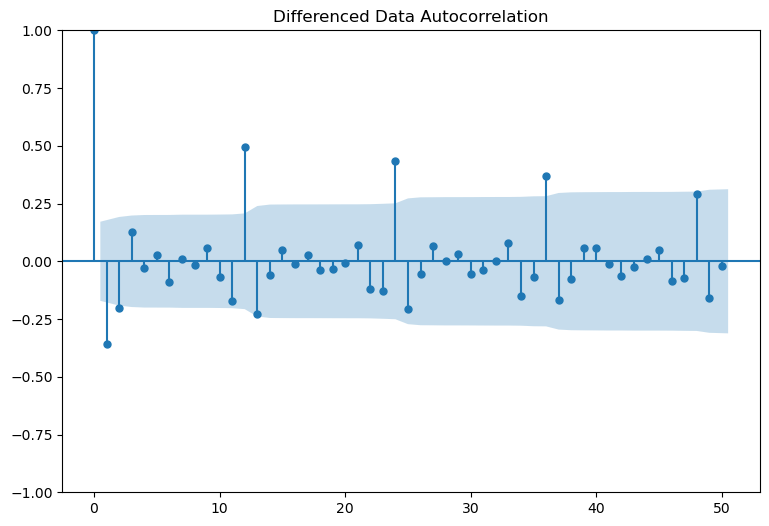

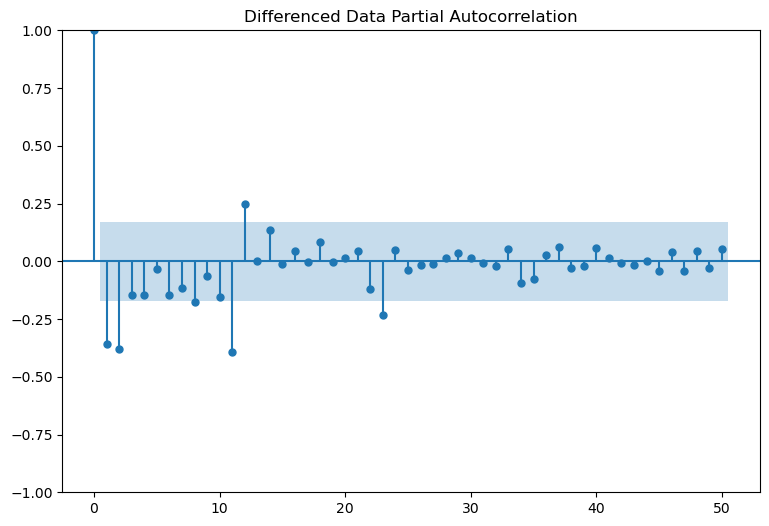

In [282]:
plot_acf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

### AR , MA values

- By observing the PACF plot, the Auto-regressive (AR) parameter p value is taken as 2.
- By observing the ACF plot, the Moving-Average (MA) parameter q value is taken as 2.
- By using these values, we can iterate with different values for manual ARIMA and SARIMA models.


## Model 1 - Auto ARIMA

In [283]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [284]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [285]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = pd.concat([ARIMA_AIC, pd.DataFrame([{'param': param, 'AIC': ARIMA_model.aic}])], ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748306
ARIMA(0, 1, 2) - AIC:1279.67152885358
ARIMA(1, 1, 0) - AIC:1317.350310538146
ARIMA(1, 1, 1) - AIC:1280.5742295380073
ARIMA(1, 1, 2) - AIC:1279.8707234231917
ARIMA(2, 1, 0) - AIC:1298.6110341604885
ARIMA(2, 1, 1) - AIC:1281.5078621868502
ARIMA(2, 1, 2) - AIC:1281.8707222264452


In [286]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1279.671529
5  (1, 1, 2)  1279.870723
4  (1, 1, 1)  1280.574230
7  (2, 1, 1)  1281.507862
8  (2, 1, 2)  1281.870722
1  (0, 1, 1)  1282.309832
6  (2, 1, 0)  1298.611034
3  (1, 1, 0)  1317.350311
0  (0, 1, 0)  1333.154673

In [287]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Sun, 16 Mar 2025   AIC                           1279.672
Time:                        19:14:52   BIC                           1288.297
Sample:                    01-31-1980   HQIC                          1283.176
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

### Model Evaluation

In [288]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [289]:
rmse = metrics.root_mean_squared_error(test['Rose'],predicted_auto_ARIMA)
print("RMSE:",rmse)

RMSE: 37.30647971926772


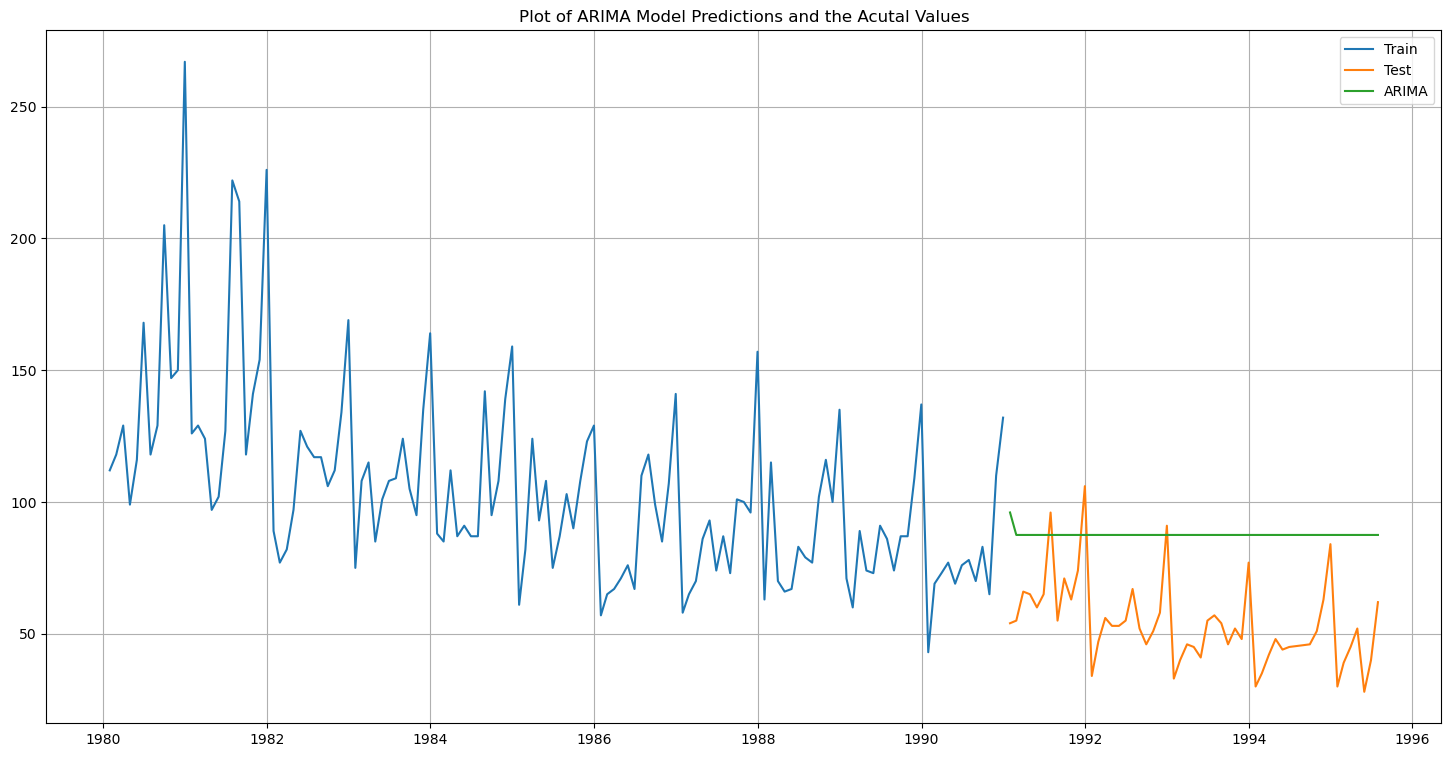

In [290]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(predicted_auto_ARIMA, label="ARIMA")


plt.legend(loc='best')
plt.grid();
plt.title('Plot of ARIMA Model Predictions and the Acutal Values');

In [291]:
temp_resultsDf0 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf0])
resultsDf

Test RMSE
Linear Regression Model                             15.268955
SimpleAverageModel                                  53.460570
2-point Trailing MovingAverage                      11.529278
4-point Trailing MovingAverage                      14.451403
6-point Trailing MovingAverage                      14.566327
9-point Trailing MovingAverage                      14.727630
Alpha=0.123,SimpleExponentialSmoothing              37.592212
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
Alpha=0.077,Beta=0.039,Gamma=0.0008,TripleExpon...  19.113110
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...   9.223504
ARIMA(0,1,2)                                        37.306480

## Model 2 - Manual ARIMA

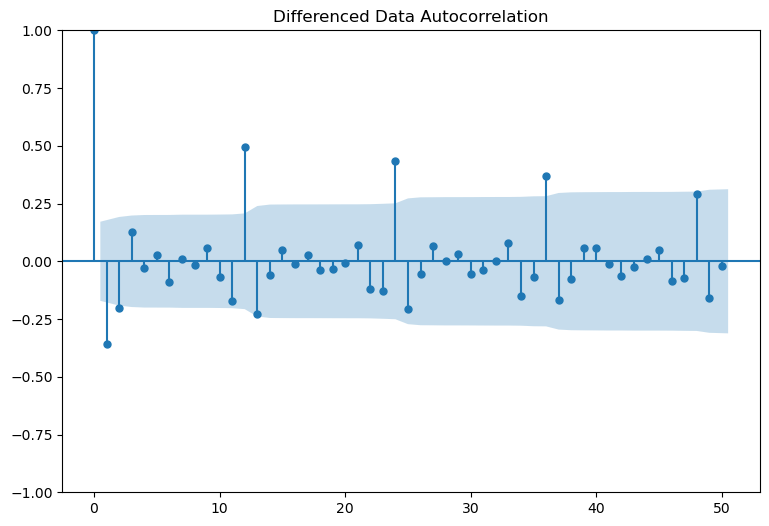

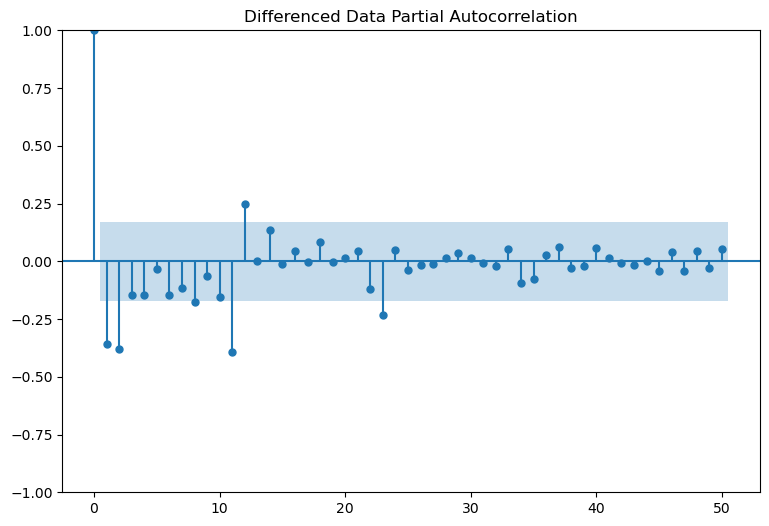

In [292]:
plot_acf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From PACF plot, p values can be selected from a range of 0-4

From ACF plot, q values can be selected from a range of 0-4

d = 1 (Data is made stationary after differencing of order 1)

In [293]:
import itertools
p = range(1, 5)
q = range(1, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [294]:
# Creating an empty Dataframe with column names only
MANUAL_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
MANUAL_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [295]:
for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    MANUAL_ARIMA_AIC = pd.concat([MANUAL_ARIMA_AIC, pd.DataFrame([{'param': param, 'AIC': ARIMA_model.aic}])], ignore_index=True)

ARIMA(1, 1, 1) - AIC:1280.5742295380073
ARIMA(1, 1, 2) - AIC:1279.8707234231917
ARIMA(1, 1, 3) - AIC:1281.8707223309964


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 4) - AIC:1279.6052629803294
ARIMA(2, 1, 1) - AIC:1281.5078621868502
ARIMA(2, 1, 2) - AIC:1281.8707222264452


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 3) - AIC:1274.6954388327786


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 4) - AIC:1278.7682893405777
ARIMA(3, 1, 1) - AIC:1282.419277627198


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(3, 1, 2) - AIC:1283.720740597714


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 3) - AIC:1278.6552163060173
ARIMA(3, 1, 4) - AIC:1287.7190768796293
ARIMA(4, 1, 1) - AIC:1283.793171512306
ARIMA(4, 1, 2) - AIC:1285.7182485624248


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 3) - AIC:1278.4514089241015
ARIMA(4, 1, 4) - AIC:1282.307483998295


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [296]:
MANUAL_ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
6   (2, 1, 3)  1274.695439
14  (4, 1, 3)  1278.451409
10  (3, 1, 3)  1278.655216
7   (2, 1, 4)  1278.768289
3   (1, 1, 4)  1279.605263
1   (1, 1, 2)  1279.870723
0   (1, 1, 1)  1280.574230
4   (2, 1, 1)  1281.507862
5   (2, 1, 2)  1281.870722
2   (1, 1, 3)  1281.870722
15  (4, 1, 4)  1282.307484
8   (3, 1, 1)  1282.419278
9   (3, 1, 2)  1283.720741
12  (4, 1, 1)  1283.793172
13  (4, 1, 2)  1285.718249
11  (3, 1, 4)  1287.719077

In [297]:
manual_ARIMA = ARIMA(train['Rose'], order=(2,1,3),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 16 Mar 2025   AIC                           1274.695
Time:                        19:14:57   BIC                           1291.947
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6781      0.084    -19.987      0.000      -1.843      -1.514
ar.L2         -0.7289      0.084     -8.682      0.000      -0.893      -0.564
ma.L1          1.0446      0.627      1.665      0.0

C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Model Evaluation

In [298]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [299]:
rmse = metrics.root_mean_squared_error(test['Rose'],predicted_manual_ARIMA)
print("RMSE:",rmse)

RMSE: 36.81303863936677


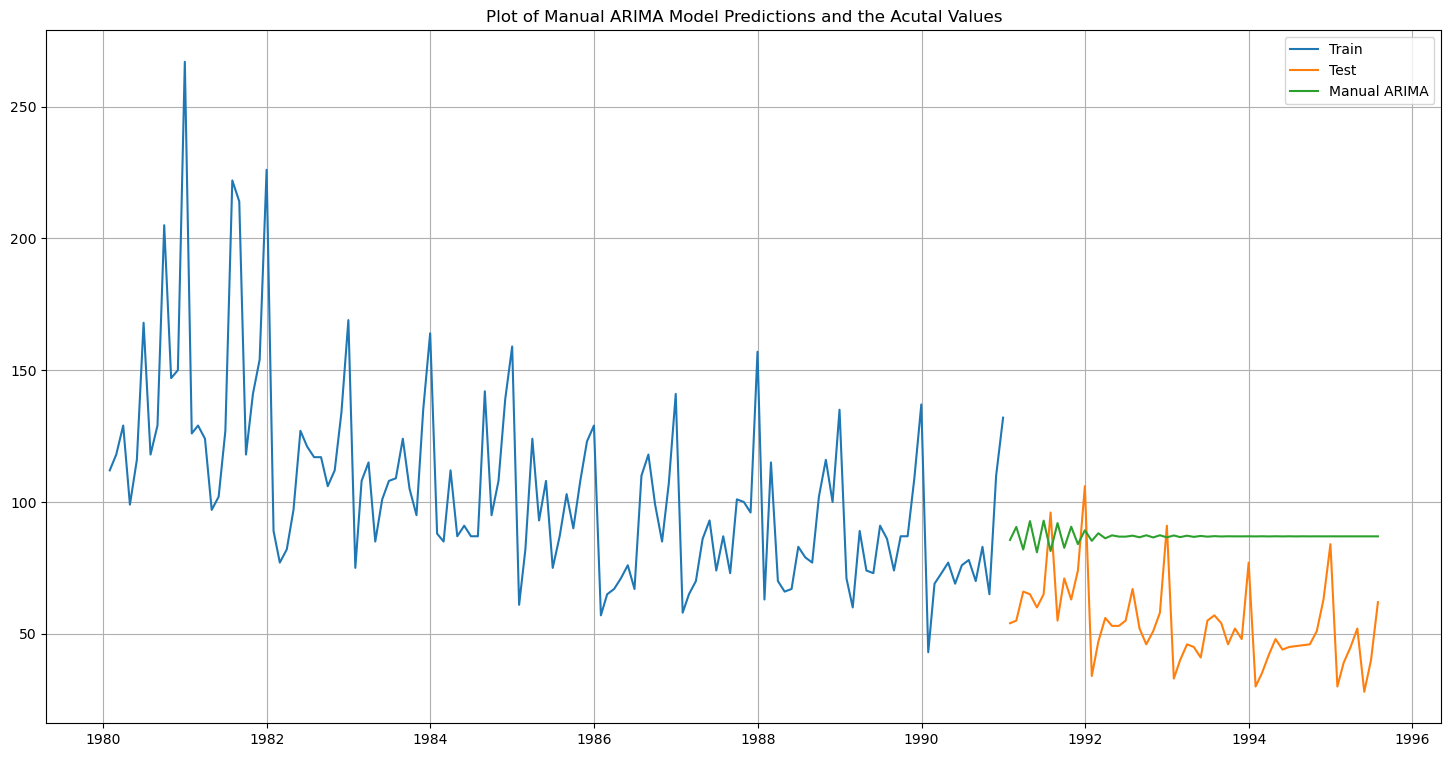

In [300]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(predicted_manual_ARIMA, label="Manual ARIMA")


plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual ARIMA Model Predictions and the Acutal Values');

In [301]:
temp_results_manual_arima = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual ARIMA(2,1,3)'])

resultsDf = pd.concat([resultsDf,temp_results_manual_arima])
resultsDf

Test RMSE
Linear Regression Model                             15.268955
SimpleAverageModel                                  53.460570
2-point Trailing MovingAverage                      11.529278
4-point Trailing MovingAverage                      14.451403
6-point Trailing MovingAverage                      14.566327
9-point Trailing MovingAverage                      14.727630
Alpha=0.123,SimpleExponentialSmoothing              37.592212
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
Alpha=0.077,Beta=0.039,Gamma=0.0008,TripleExpon...  19.113110
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...   9.223504
ARIMA(0,1,2)                                        37.306480
Manual ARIMA(2,1,3)                                 36.813039

## Model 3 - Auto SARIMA

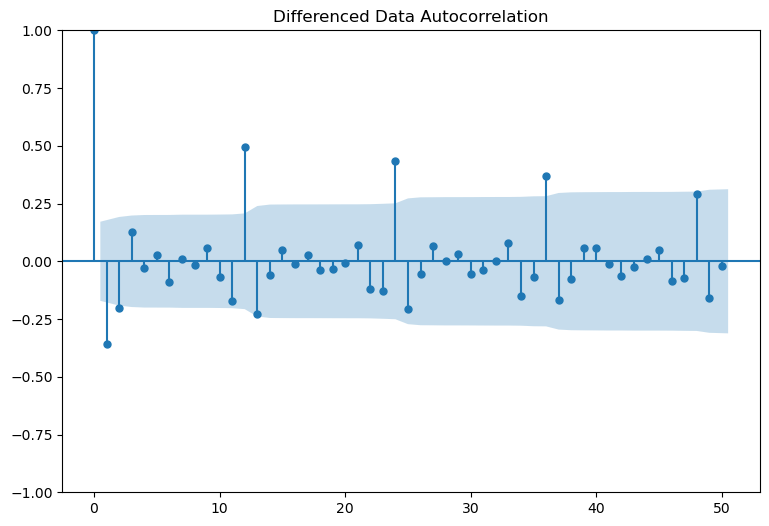

In [302]:
plot_acf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [303]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [304]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [305]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = pd.concat([SARIMA_AIC, pd.DataFrame([{'param': param, 'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}])], ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720732
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380884


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4697.949509445315
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.020786938651
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753375


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:4249.939989191701
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697583
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945623


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3556.712091180217
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.7535403931095
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702689737
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136127141


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3261.0733330830913
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918339
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383767


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:4074.440571471982
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918726
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330946503
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483305356


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:4036.6628438841394
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535977
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461677
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988322952154


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3666.549541162177
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:798.5889764822363
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:800.4844932589168
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:801.0595269305047


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3564.874619910057
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.667543054105
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.486697526498
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.49384866177


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:2937.9139968921277
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.8332843413407
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933576927
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913549838


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:2711.098530837049
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257947
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545030109
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085678072


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:2075.7049761033345
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:800.10201893745
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:801.9941080535122
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:802.520652839455


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:2200.14230253041
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1243.9501216739143
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1076.7632646079544
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:905.692653338057


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:4719.421779546636
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1089.205136121228
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1034.841121293661
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:896.8362523340834


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3482.0655204794634
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:914.9477108987107
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:916.0630996873466
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:880.5509788252812


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3557.728434614479
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:802.0987124751114
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:803.9928772315294
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:804.5150749997933
SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3593.869031748283
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.29554475857
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.9405391257685


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3909.8900646565576
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.886078680456
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.4080055026309
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972949148


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3870.26873444542
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778663985
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:940.9087133661069
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.2973103071342


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3495.4319974134633
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:819.3931032272649
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:821.1501371573568
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:819.1305086842707


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3399.583204590994
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064255516
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.3172708640705
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.0862224063886
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:4180.042950296278
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937965031882
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.7180547135217
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428512084
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:4142.251698203357
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.9249060839602
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867470755
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.6725795936867
SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3772.1271950116625
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:789.2360439384619
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:790.9603447845733
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:790.81138502816


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3656.6067087795827
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.9495040706167
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1085.4861928100947
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:915.4938411310807
SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:4137.225284164063
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1090.7760927474617
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.6183215019523
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.7318505560866


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:4025.9671143693568
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.1690196736757
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.459782937152
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:896.6870119284117


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3659.052551728502
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:791.0073801395663
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:792.6312809875807
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:792.1390255081614


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3549.9929560882365
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1245.5463125316405
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1072.9849747872945
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:907.4130105109167


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3183.7373369879497
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1082.3281487675918
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1036.1950930476726
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:897.5232299123185


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3086.083499500576
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:908.268761737614
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:909.7955658753671
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:880.2886589005791


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3577.8345502748757
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:793.0150361115934
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:794.6310156568421
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:794.0467926568293
SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3232.2422517074738
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.2537561535767
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.7773704711547
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.0793208829958
SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:4221.49157630756
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.5086021575896
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.7863198641226
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.1988165559469
SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:4186.641501409842
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.6004792645423
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801384962
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280784


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3810.1328225890757
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:806.0536407408624
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:808.0472637903838
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:806.4988191368922


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3933.641505551752
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1263.2315231799287
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1094.2093491949393
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472068887


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:3259.548644482148
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.424960110146
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.9244471207116
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.242491282267


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:4054.3162265035603
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608005964
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.6399565369504
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866290442


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3759.594436660003
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.3932600241097
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639258917215
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.0598888702089


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3364.0135005331354
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.9102116146687
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.9643552598209
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311112643


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3683.3441023790774
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713701044
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909353548504
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488813818


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3712.0123013698108
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464442121718
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781891549096
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6687985034246


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3423.904599023266
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:785.1199713596457
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:786.941003545748
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:786.9640492422003


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3340.384055774441
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1238.1052288787096
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1067.8073333629866
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:908.3349316192679


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:4083.446446364437
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1073.2563252755258
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1024.046196978512
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:890.9483353881385


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:4045.2532126722112
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:893.3579301551715
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:903.2328074659539
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:879.2191800887924


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3678.2202967430485
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:782.4074208045705
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:783.4101465864052
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:781.0452530842881


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3594.00089206683
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1269.8130062641508
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1119.1703158042226
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:953.3440589118023
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:4226.860616428493
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1080.5468456726298
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1065.5569726784834
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:943.6865996304793
SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:4188.641501409842
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:909.7203197968981
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:911.0620713976481
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:913.0438816472913
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3814.51565943324
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:796.0564701528782
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:795.5410167662641
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:794.6677017173483


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3558.603572022808
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1255.0658180709352
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1095.68946412229
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:923.8872427547436


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3261.5483022607896
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1064.6149136507277
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1046.0837553959811
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:917.030800938433


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:4056.3162265035594
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:887.320445989928
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:888.3279208538174
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:890.1571522289942
SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3760.1136503543607
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:775.4266990351974
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:775.4953300778068
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:774.4002850939587


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3786.902364900701
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1255.9835652641818
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1086.709240608372
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:917.7980112783403


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:4045.1398980256054
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1066.2776211327755
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1046.126051732869
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:909.2875089184776


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3881.703156059297
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:889.3184264346248
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:890.3277441197066
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:896.1431273800212


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:2816.863613831223
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:777.2505639471267
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:776.3462209382552
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:774.8809445409028


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3765.2797987160616
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1243.738595733092
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1060.5397647902196
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:910.3340166337682


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:3861.1010885270925
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1066.846138739448
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1039.7662380440725
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:900.0483663412293


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3888.152960070099
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:884.0463711761009
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:885.9217106561805
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:880.559571526195


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:2719.734600739672
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:775.561018479151
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:776.3690387079178
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:778.2316245177846


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3438.5239150799525


In [306]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
222  (3, 1, 1)  (3, 0, 2, 12)  774.400285
238  (3, 1, 2)  (3, 0, 2, 12)  774.880945
220  (3, 1, 1)  (3, 0, 0, 12)  775.426699
221  (3, 1, 1)  (3, 0, 1, 12)  775.495330
252  (3, 1, 3)  (3, 0, 0, 12)  775.561018

In [307]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(3,1,1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Sun, 16 Mar 2025   AIC                            774.400
Time:                                         19:18:03   BIC                            799.618
Sample:                                              0   HQIC                           784.578
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.202       0

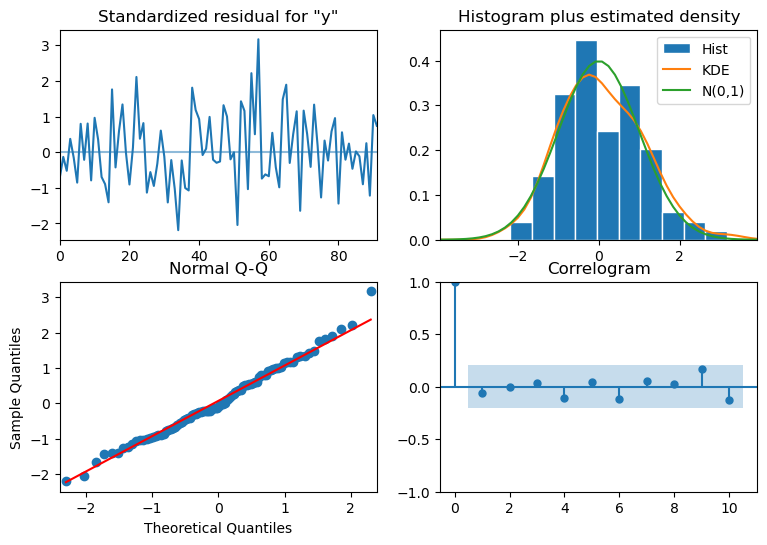

In [308]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

### Model Predictions

In [309]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [310]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  55.235178  13.907807      27.976377      82.493978
1  68.123057  13.991252      40.700707      95.545406
2  67.908691  14.012304      40.445081      95.372302
3  66.786180  14.099610      39.151453      94.420908
4  69.760068  14.108969      42.106996      97.413139

In [311]:
rmse = metrics.root_mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean)
print(rmse)

18.881936359165838


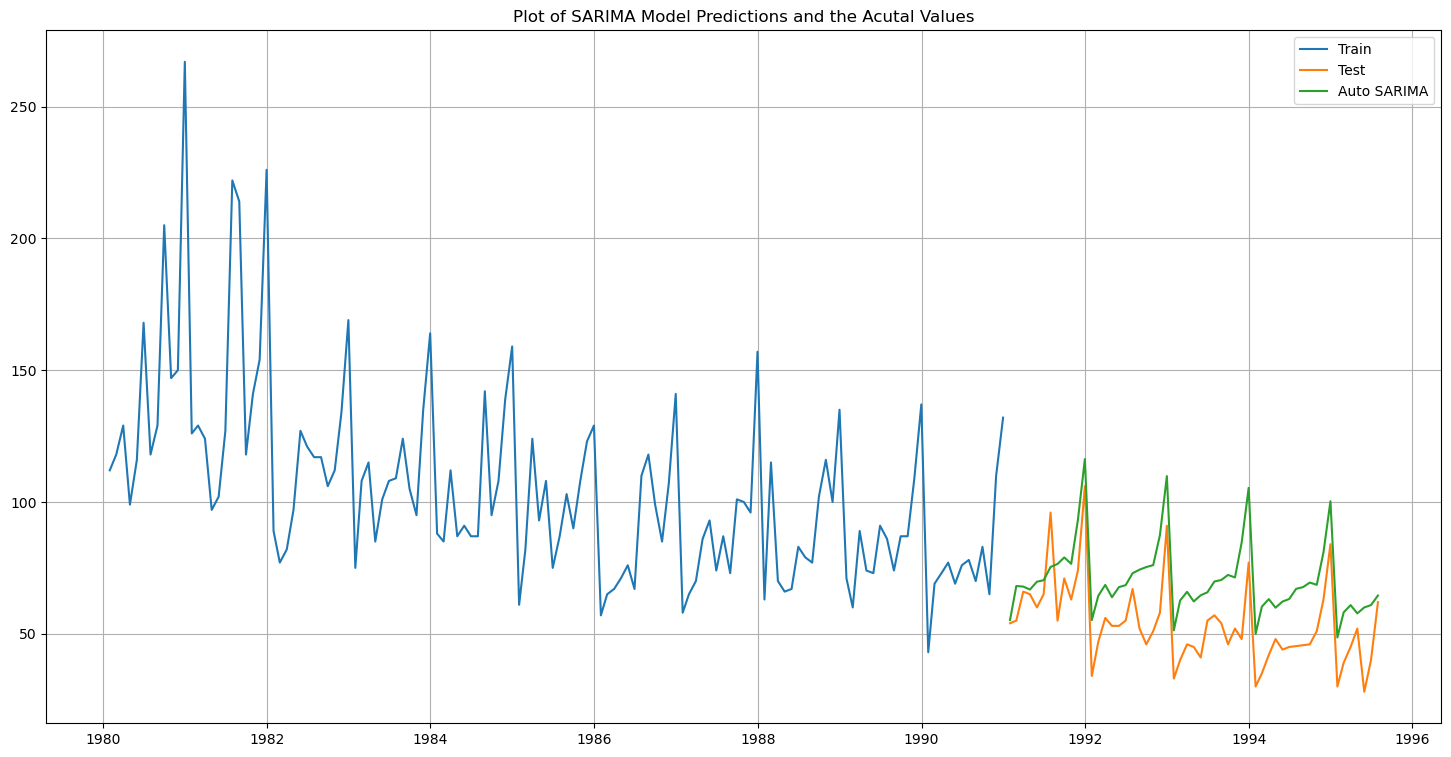

In [312]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(test.index,predicted_auto_SARIMA_6.predicted_mean, label="Auto SARIMA")


plt.legend(loc='best')
plt.grid();
plt.title('Plot of SARIMA Model Predictions and the Acutal Values');

In [313]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(3,1,1)(3,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
Linear Regression Model                             15.268955
SimpleAverageModel                                  53.460570
2-point Trailing MovingAverage                      11.529278
4-point Trailing MovingAverage                      14.451403
6-point Trailing MovingAverage                      14.566327
9-point Trailing MovingAverage                      14.727630
Alpha=0.123,SimpleExponentialSmoothing              37.592212
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
Alpha=0.077,Beta=0.039,Gamma=0.0008,TripleExpon...  19.113110
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...   9.223504
ARIMA(0,1,2)                                        37.306480
Manual ARIMA(2,1,3)                                 36.813039
SARIMA(3,1,1)(3,0,2,12)                             18.881936

## Model 4 - Manual SARIMA

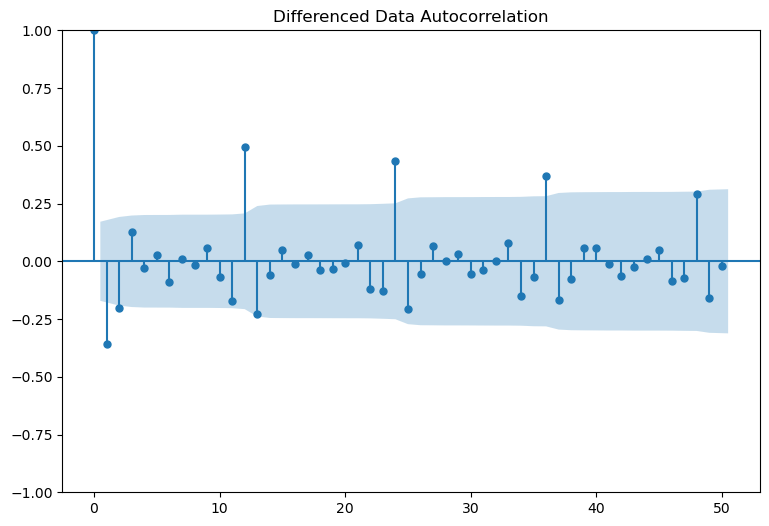

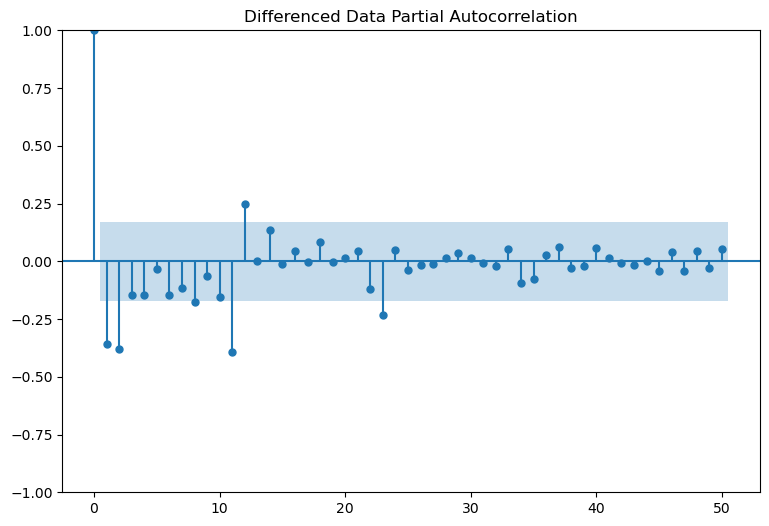

In [314]:
plot_acf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From PACF plot, p values can be selected from a range of 0-2

From ACF plot, q values can be selected from a range of 0-2

d = 1 (Data is made stationary after differencing of order 1)

D = 1 (Since there are strong seasonal patterns in ACF, seasonal differencing can be done)

In [315]:
import itertools
p = range(0, 3)
q = range(0, 3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [316]:
MANUAL_SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
MANUAL_SARIMA_AIC


Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [317]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_mSARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_mSARIMA.aic))
        MANUAL_SARIMA_AIC = pd.concat([MANUAL_SARIMA_AIC, pd.DataFrame([{'param': param, 'seasonal':param_seasonal ,'AIC': results_mSARIMA.aic}])], ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1171.2013438278946
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:965.5057301624336
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:845.8687014776231
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:982.3269589658804
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:975.3375383601615
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:847.7332182654693
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:858.5132698374409
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:853.3390729148598
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:842.6282244226072
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1113.7663133562694
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:915.0730606718114
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:790.9032809265707
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:944.2456655530647
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:929.3362488520094
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:792.7161670342816
SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:810.3194350158651
SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:804.1555788048815
SARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:782.1538715247449
SARIMA(0, 1, 2)x(0, 1, 0, 

In [318]:
MANUAL_SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 1, 2, 12)  774.969120
53  (1, 1, 2)  (2, 1, 2, 12)  776.940109
80  (2, 1, 2)  (2, 1, 2, 12)  776.996101
17  (0, 1, 1)  (2, 1, 2, 12)  782.153872
79  (2, 1, 2)  (2, 1, 1, 12)  783.703652

In [319]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.485
Date:                            Sun, 16 Mar 2025   AIC                            774.969
Time:                                    19:18:38   BIC                            792.622
Sample:                                         0   HQIC                           782.094
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9524      0.184     -5.166      0.000      -1.314      -0.591
ma.L2         -0.0764      0.126   

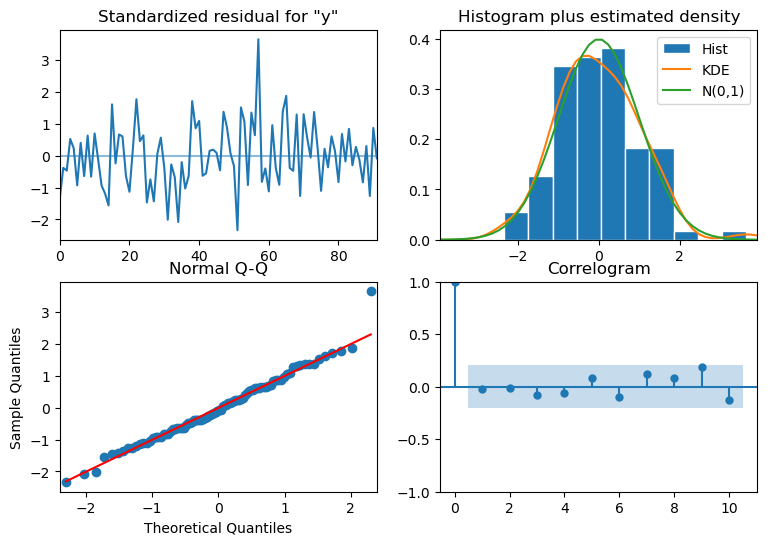

In [320]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

### Model Predictions

In [321]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [322]:
predicted_manual_SARIMA.predicted_mean

array([ 44.21319258,  62.32632241,  67.31344502,  63.16075006,
        66.47495385,  66.38257551,  73.46399699,  75.27382845,
        76.45546376,  74.17767081,  96.96834481, 127.45602899,
        42.08805483,  56.78911735,  63.60362389,  57.30130219,
        62.49895275,  62.03841754,  69.42805151,  72.28756572,
        71.83296491,  72.55381574,  91.31813725, 123.24271734,
        37.71707276,  52.57847622,  59.43932898,  53.37523668,
        58.18950758,  58.00828022,  65.19993301,  67.69905414,
        67.66080456,  67.86721157,  87.3682956 , 119.00642234,
        33.37193118,  48.38389806,  55.17045828,  49.2078056 ,
        53.92481797,  53.77240746,  60.9416555 ,  63.3795324 ,
        63.42977214,  63.48593651,  83.19096241, 114.75517919,
        29.12206749,  44.1345447 ,  50.91559971,  44.94783902,
        49.67623774,  49.51351469,  56.68997762])

In [323]:
predicted_manual_SARIMA.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  44.213193  14.221699      16.339175      72.087210
1  62.326322  14.300474      34.297908      90.354737
2  67.313445  14.302377      39.281301      95.345589
3  63.160750  14.305281      35.122915      91.198585
4  66.474954  14.310655      38.426585      94.523322

In [324]:
rmse = metrics.root_mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean)
print(rmse)

16.500279790742578


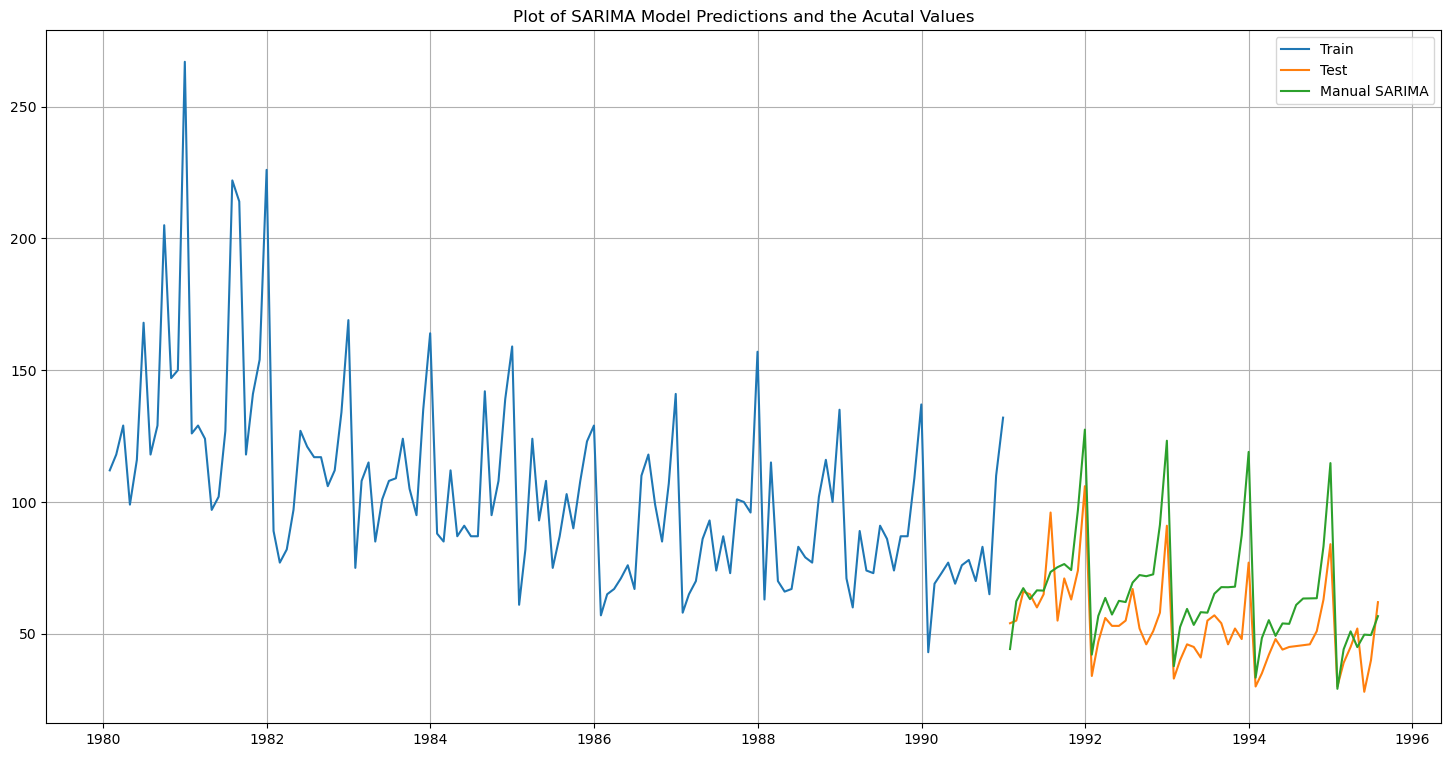

In [325]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(test.index,predicted_manual_SARIMA.predicted_mean, label="Manual SARIMA")


plt.legend(loc='best')
plt.grid();
plt.title('Plot of SARIMA Model Predictions and the Acutal Values');

In [326]:
temp_results_ManualSARIMA = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual SARIMA(0,1,2)(2,1,2,12)'])

In [327]:
resultsDf = pd.concat([resultsDf,temp_results_ManualSARIMA])
resultsDf

Test RMSE
Linear Regression Model                             15.268955
SimpleAverageModel                                  53.460570
2-point Trailing MovingAverage                      11.529278
4-point Trailing MovingAverage                      14.451403
6-point Trailing MovingAverage                      14.566327
9-point Trailing MovingAverage                      14.727630
Alpha=0.123,SimpleExponentialSmoothing              37.592212
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
Alpha=0.077,Beta=0.039,Gamma=0.0008,TripleExpon...  19.113110
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...   9.223504
ARIMA(0,1,2)                                        37.306480
Manual ARIMA(2,1,3)                                 36.813039
SARIMA(3,1,1)(3,0,2,12)                             18.881936
Manual SARIMA(0,1,2)(2,1,2,12)                      16.500280

## Plotting the ARIMA and SARIMA models

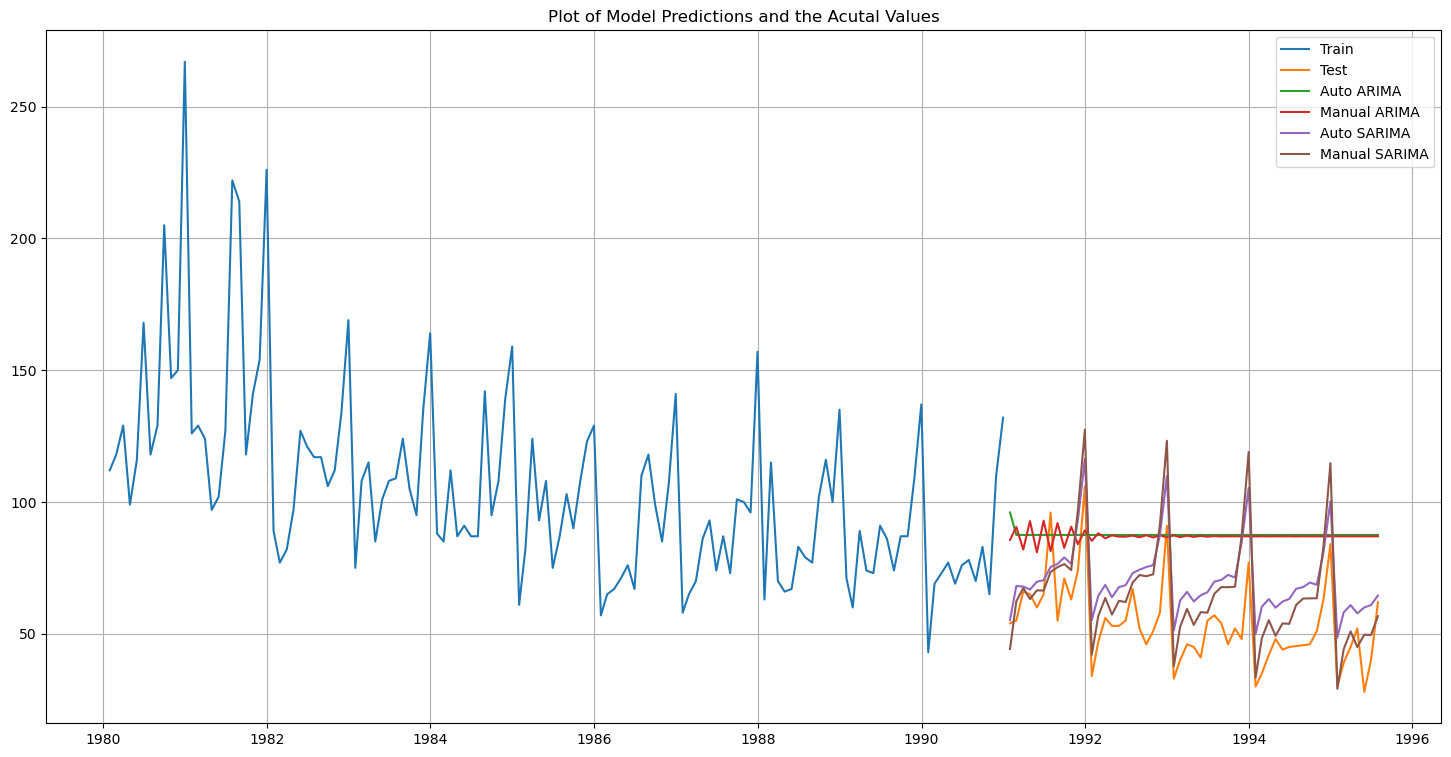

In [328]:
plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(predicted_auto_ARIMA, label="Auto ARIMA")
plt.plot(predicted_manual_ARIMA, label="Manual ARIMA")
plt.plot(test.index,predicted_auto_SARIMA_6.predicted_mean, label="Auto SARIMA")
plt.plot(test.index,predicted_manual_SARIMA.predicted_mean, label="Manual SARIMA")

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Model Predictions and the Acutal Values');

## Evaluating the perfomance of all models

In [329]:
resultsDf.sort_values(by=["Test RMSE"])

Test RMSE
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...   9.223504
2-point Trailing MovingAverage                      11.529278
4-point Trailing MovingAverage                      14.451403
6-point Trailing MovingAverage                      14.566327
9-point Trailing MovingAverage                      14.727630
Linear Regression Model                             15.268955
Manual SARIMA(0,1,2)(2,1,2,12)                      16.500280
SARIMA(3,1,1)(3,0,2,12)                             18.881936
Alpha=0.077,Beta=0.039,Gamma=0.0008,TripleExpon...  19.113110
Manual ARIMA(2,1,3)                                 36.813039
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
ARIMA(0,1,2)                                        37.306480
Alpha=0.123,SimpleExponentialSmoothing              37.592212
SimpleAverageModel                                  53.460570

### We see that the best model is the Triple Exponential Smoothing  with the parameters $\alpha$ = 0.1, $\beta$ = 0.2 and $\gamma$ = 0.1 with the test RMSE score of 9.22

## Rebuilding the best model using the entire data

In [330]:
final_model =  ExponentialSmoothing(df2['Rose'],
                                        trend='additive',
                                        seasonal='multiplicative',
                                        freq='M').fit(smoothing_level=0.1,
                                                      smoothing_trend=0.2,
                                                      smoothing_seasonal=0.1,
                                                      optimized=False,use_brute=True)

In [331]:
final_model.params

{'smoothing_level': 0.1,
 'smoothing_trend': 0.2,
 'smoothing_seasonal': 0.1,
 'damping_trend': nan,
 'initial_level': 145.27499999999992,
 'initial_trend': 0.7643939393939476,
 'initial_seasons': array([0.75572235, 0.80417408, 0.89051255, 0.75964172, 0.88067767,
        0.92553586, 1.08905952, 1.13538639, 1.03030222, 0.96585715,
        1.13788391, 1.62524659]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [332]:
RMSE_final_model = metrics.root_mean_squared_error(df2['Rose'],final_model.fittedvalues)

print('RMSE:',RMSE_final_model)

RMSE: 17.115443720215676


In [333]:
final_prediction = final_model.forecast(steps=12)

In [334]:
final_prediction

1995-08-31    50.188630
1995-09-30    49.914641
1995-10-31    50.355447
1995-11-30    59.009122
1995-12-31    82.169663
1996-01-31    33.801242
1996-02-29    40.732280
1996-03-31    46.135859
1996-04-30    44.838420
1996-05-31    43.313514
1996-06-30    47.750927
1996-07-31    55.037547
Freq: M, dtype: float64

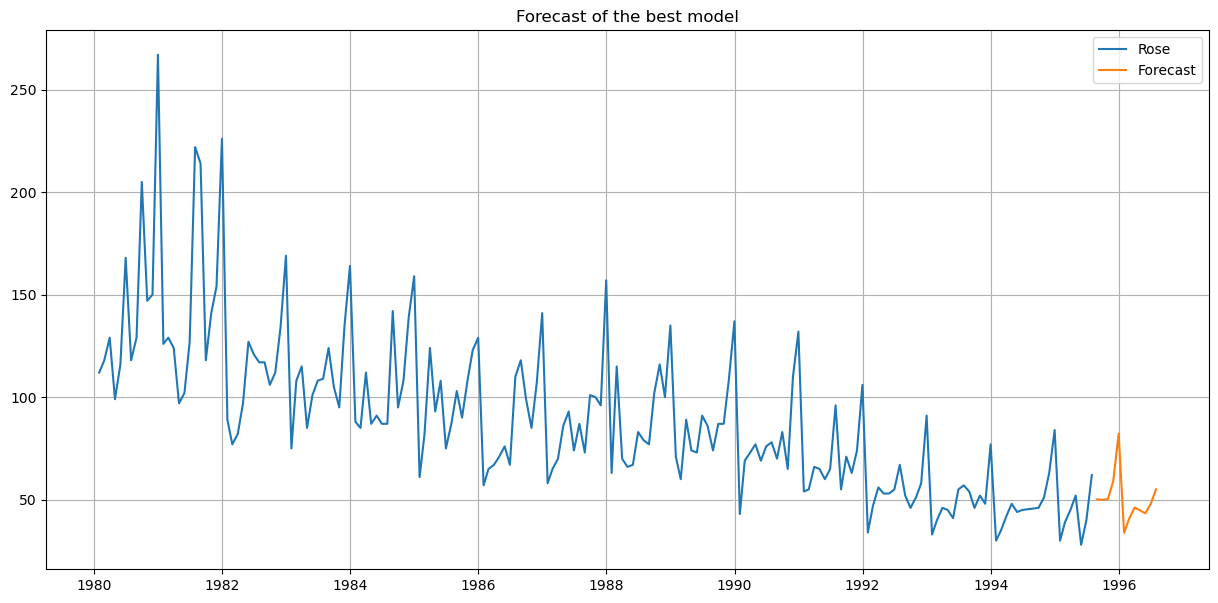

In [335]:
plt.figure(figsize=(15,7))
plt.plot(df2['Rose'], label='Rose')
plt.plot(final_prediction, label="Forecast")

plt.legend(loc='best')
plt.grid();
plt.title("Forecast of the best model");

In [336]:
fpred_df = pd.DataFrame({'lower_CI':final_prediction - 1.96*np.std(final_model.resid,ddof=1),
                          'prediction':final_prediction,
                          'upper_ci': final_prediction + 1.96*np.std(final_model.resid,ddof=1)})
fpred_df.head()

lower_CI  prediction    upper_ci
1995-08-31  16.555092   50.188630   83.822168
1995-09-30  16.281103   49.914641   83.548179
1995-10-31  16.721909   50.355447   83.988984
1995-11-30  25.375584   59.009122   92.642660
1995-12-31  48.536125   82.169663  115.803201

In [337]:
fpred_df.tail()

lower_CI  prediction   upper_ci
1996-03-31  12.502321   46.135859  79.769397
1996-04-30  11.204882   44.838420  78.471958
1996-05-31   9.679976   43.313514  76.947052
1996-06-30  14.117390   47.750927  81.384465
1996-07-31  21.404009   55.037547  88.671085

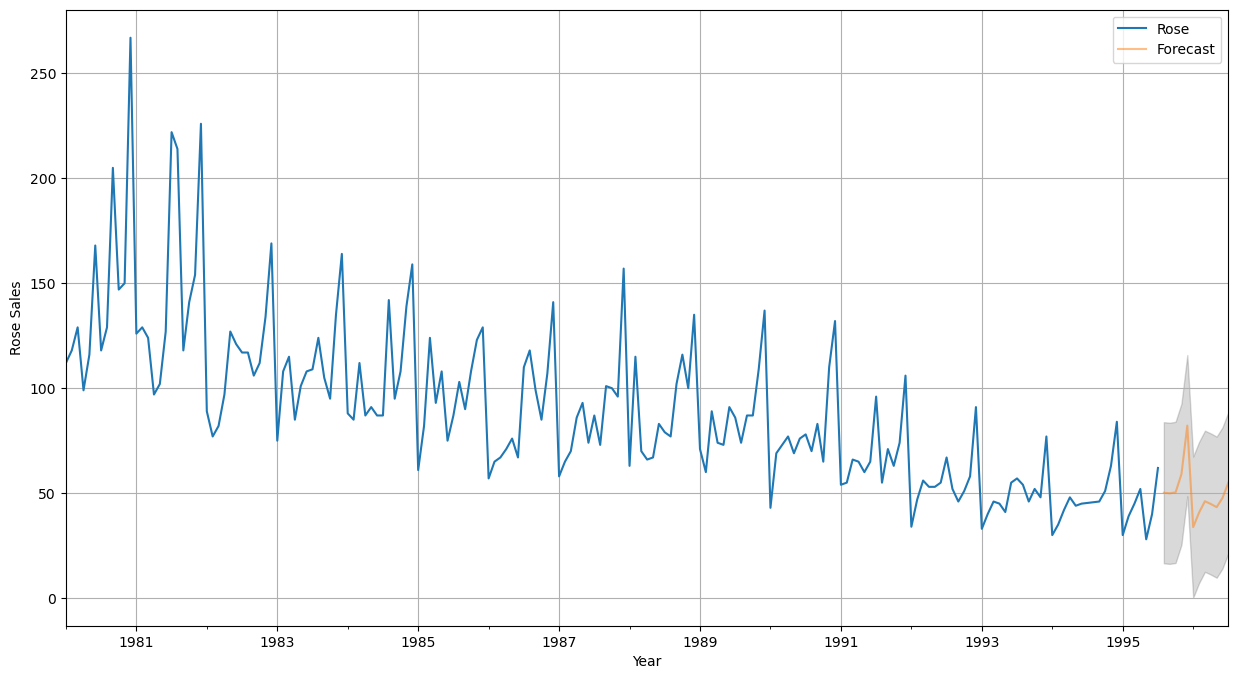

In [338]:
# plot the forecast along with the confidence band

axis = df2.plot(label='Actual', figsize=(15,8))
fpred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(fpred_df.index, fpred_df['lower_CI'], fpred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year')
axis.set_ylabel('Rose Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

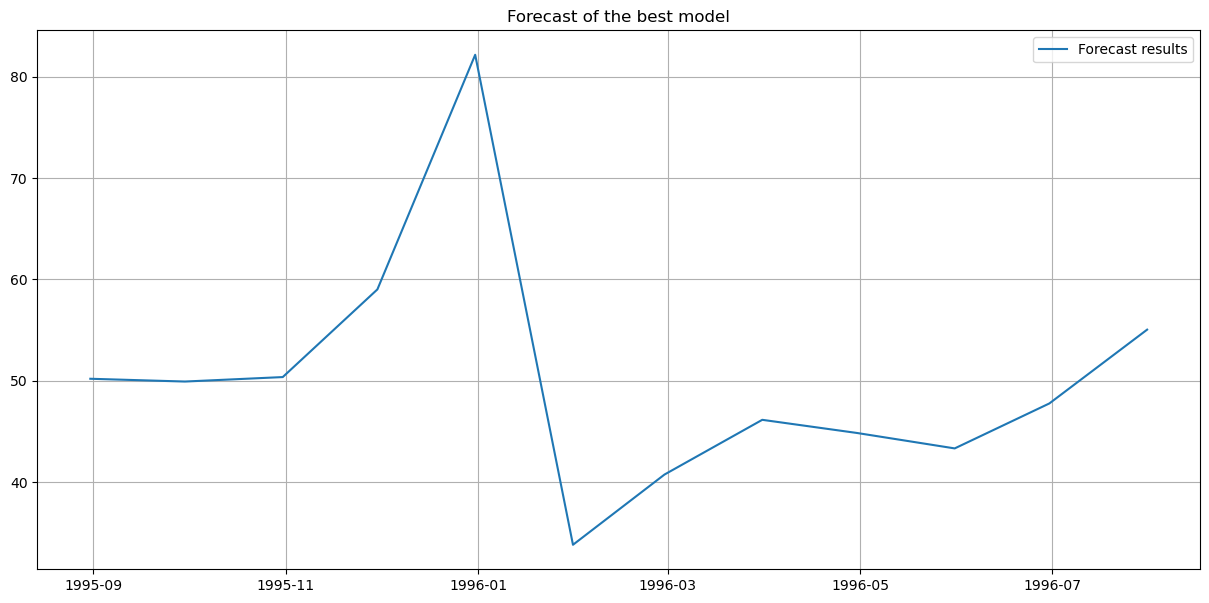

In [339]:
plt.figure(figsize=(15,7))

plt.plot(final_prediction, label="Forecast results")

plt.legend(loc='best')
plt.grid();
plt.title("Forecast of the best model");